In [40]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# LIF Class

In [41]:
class LIF:
    def __init__(self, no_fig ,dt=0.1, u_rest=-70, u_reset=-75, n_type='exc', u_spike=40, R=10, I_lst=[], tau=8, thresh=-50, duration=20):
        self.fig = no_fig
        self.dt = 1
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R = R
        self.n_type = n_type
        self.tau = tau
        self.thresh = thresh
        self.duration = duration
        self.u_spike = u_spike
        self.spike = []
        self.time = []
        self.current_lst = I_lst * np.ones(int(duration / dt))
        self.u = []
        for i in range(0, int(duration/dt), 1):
            self.time.append(i * dt)
            self.u.append(0)
        self.potential()
        return

    
    def potential(self):
        for i in range(0, len(self.time)):
            self.u[i] = (((self.u_rest - self.u[i-1]) + self.current_lst[i]*self.R)*self.dt)/self.tau + self.u[i-1]
            if self.u[i] >= self.thresh:
                self.u[i-1] = self.u_spike
                self.u[i] = self.u_reset
                self.spike.append(self.time[i])
        return


    def my_plot(self, bool_marker, no_fig, x_lst, y_lst, title, x_label, y_label, no_subplots, *args):
        plt.figure(figsize=(16,12))
        plt.figure(no_fig)
        plt.subplot(no_subplots, 1, 1, title=title, xlabel=x_label, ylabel=y_label)
        if bool_marker:
            plt.plot(x_lst, y_lst, marker='o')
        else:
            plt.plot(x_lst, y_lst)
        if no_subplots > 1:
            for i in range(no_subplots - 1):
                plt.subplot(no_subplots, 1, i+2, title=args[5*i + 2], xlabel=args[5*i + 3], ylabel=args[5*i +4])
                plt.plot(args[5*i+0], args[5*i + 1])
        return

    def plot(self):
        self.my_plot(False,self.fig, self.time, self.u, 'U - T', 'Time', 'Potential', 2, self.time, self.current_lst,
                'I - T', 'Time', 'Current')
        return
    

    @staticmethod
    def frequency():
        no_test = 800
        max_current = 8
        f = []
        for i in range(800):
            x = LIF(1, 0.1, I_lst=i * max_current / no_test, duration=200)
            if (len(x.spike) > 1):
                f.append(1 / (x.spike[1] - x.spike[0]))
            elif (len(x.spike) == 1):
                f.append(1 / x.time[-1])
            else:
                f.append(0)
        plt.figure(figsize=(8,3))
        x.sin_plot(False, 1,np.arange(0, max_current, max_current/no_test), f, 'F - I', 'Current', 'Frequency', 1)
        


# Neurons Group Class

In [42]:
class NeuronsGroup:

    def __init__(self, neurons, connections, excw=10, inhw=-10, exc_delay=0, inh_delay=0, iteration_count=200):
        self.neurons = neurons
        self.neuron_action = []
        for i in neurons:
            self.neuron_action.append(i.u)

        self.connections = connections
        self.excw = excw
        self.inhw = inhw
        self.iteration_count = iteration_count
        self.spikes = []
        self.exc_spikes_time = []
        self.exc_spikes = []
        self.inh_spikes_time = []
        self.inh_spikes = []
        self.exc_delay = exc_delay
        self.inh_delay = inh_delay
        self.spikes_effect = []
    
    def start(self):
        self.spikes_effect = [[0] * len(self.neurons) for _ in range(self.iteration_count)]
        
        for t in range(self.iteration_count):
            
            for i in  range(len(self.neuron_action)):

                if self.neuron_action[i][t] >= self.neurons[i].thresh:
          
                    for j in self.connections[i]:
                        if self.neurons[i].n_type == 'exc':
                            self.exc_spikes.append(i + 1)
                            self.exc_spikes_time.append(t)
                            if t+self.exc_delay < self.iteration_count:
                                self.neuron_action[j][t + self.exc_delay] += self.excw
                                if self.neuron_action[j][t + self.exc_delay] >= self.neurons[j].thresh:
                                    if self.neurons[j].n_type == 'exc':
                                        self.exc_spikes.append(j + 1)
                                        self.exc_spikes_time.append(t)
                                    else:
                                        self.inh_spikes.append(j + 1)
                                        self.inh_spikes_time.append(t)
                                    self.neurons[j].u[t - 1] = self.neurons[j].u_spike
                                    self.neurons[j].u[t] = self.neurons[j].u_reset

                        if self.neurons[i].n_type == 'inh':
                            self.inh_spikes.append(i + 1)
                            self.inh_spikes_time.append(t)
                            if t+self.inh_delay < self.iteration_count:
                                self.neuron_action[j][t + self.inh_delay]  += self.inhw

    def neurons_u_plot(self, neurons_count=5):
        legend = []
        for i in range(min(neurons_count, len(self.neurons))):
            plt.plot(list(map(lambda j: j * self.neurons[i].dt, range(len(self.neurons[i].u)))), self.neurons[i].u)
            legend.append('neuron ' + str(i+1))
        plt.legend(legend)

    def raster_plot(self):
        plt.scatter(self.exc_spikes_time, self.exc_spikes, color='blue', s=10)
        plt.scatter(self.inh_spikes_time, self.inh_spikes, color='red', s=10)
        plt.legend(['Excitatory', 'Inhibitory'])

In [43]:
def sin_current():
    arr = np.empty(200)
    for i in range(200):
        arr[i] = 3 * (math.sin(i/15) + 0.9)
    return arr

# Task 1
### excitatory - excitatory

In [44]:
neuron1 = LIF(1,I_lst=sin_current())
neuron2 = LIF(2,I_lst=2.5)

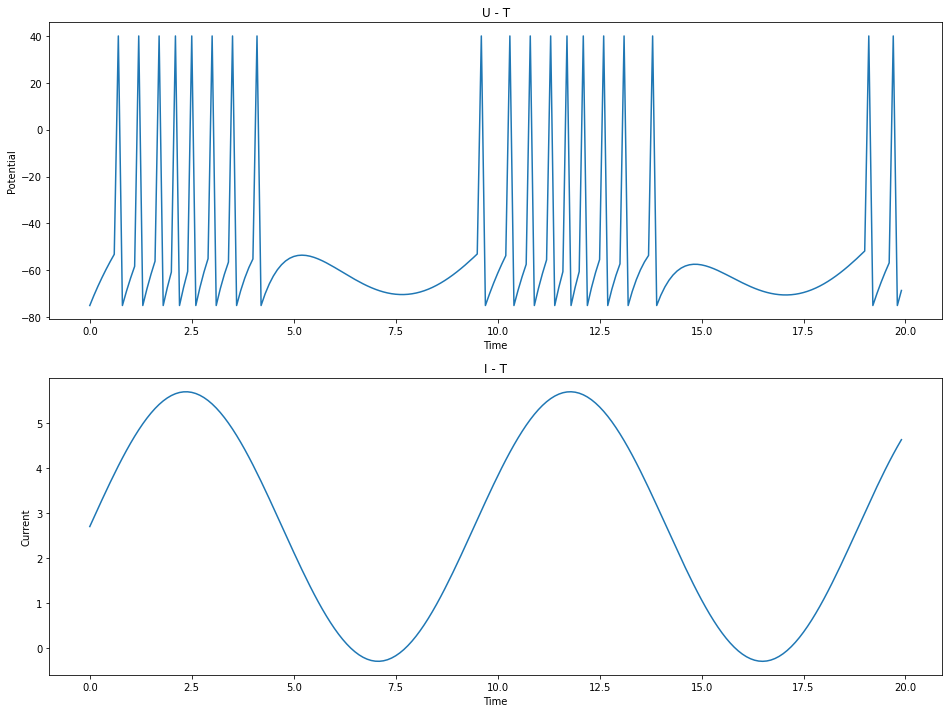

In [45]:
neuron1.plot()

<Figure size 1152x864 with 0 Axes>

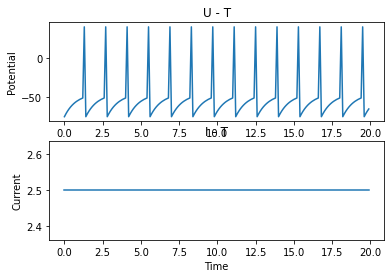

In [46]:
neuron2.plot()

In [47]:
neurons = [neuron1, neuron2]
connections = [[1], [0]]
neurons_group = NeuronsGroup(neurons, connections)
neurons_group.start()

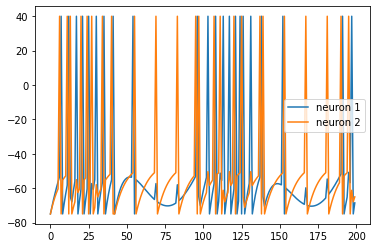

In [48]:
neurons_group.neurons_u_plot()

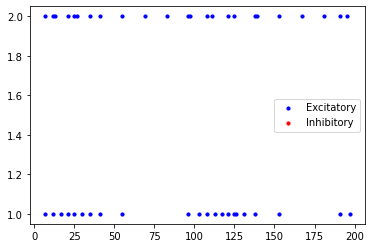

In [49]:
neurons_group.raster_plot()

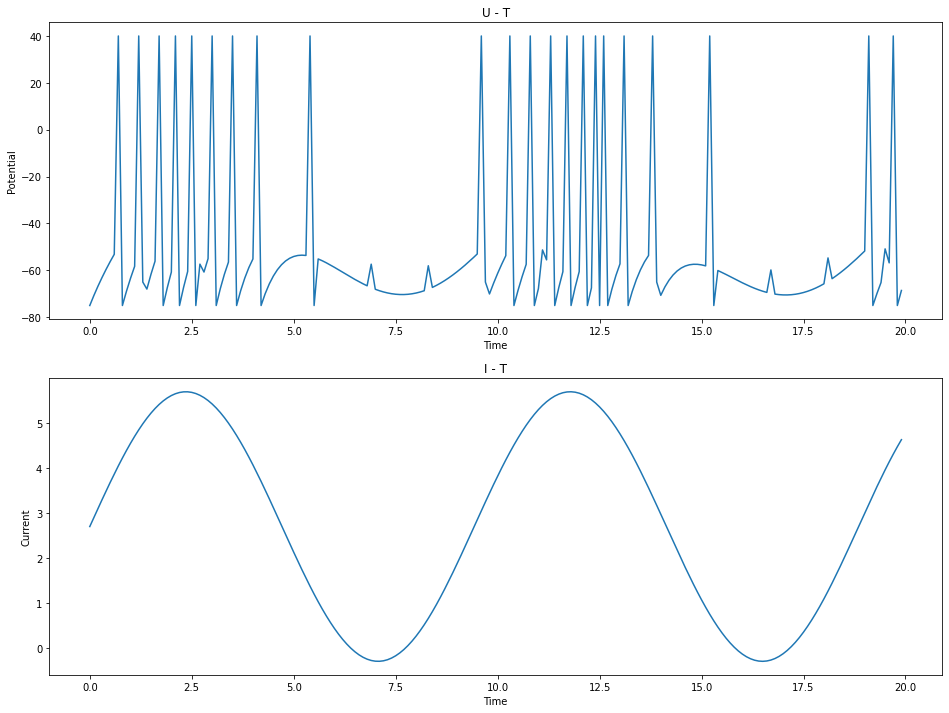

In [50]:
neuron1.plot()

<Figure size 1152x864 with 0 Axes>

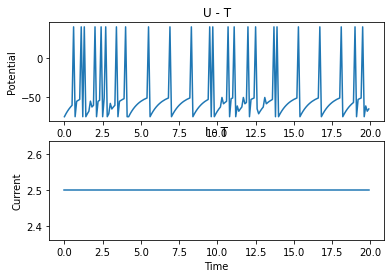

In [51]:
neuron2.plot()

### excitatory - inhibitory

In [52]:
neuron1 = LIF(1,I_lst=sin_current())
neuron2 = LIF(2,I_lst=2.5 , n_type='inh')

In [53]:
neurons = [neuron1, neuron2]
connections = [[1], [0]]
neurons_group = NeuronsGroup(neurons, connections,excw=50, inhw=-50)
neurons_group.start()

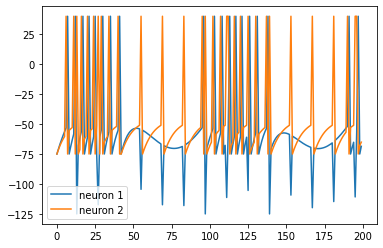

In [54]:
neurons_group.neurons_u_plot()

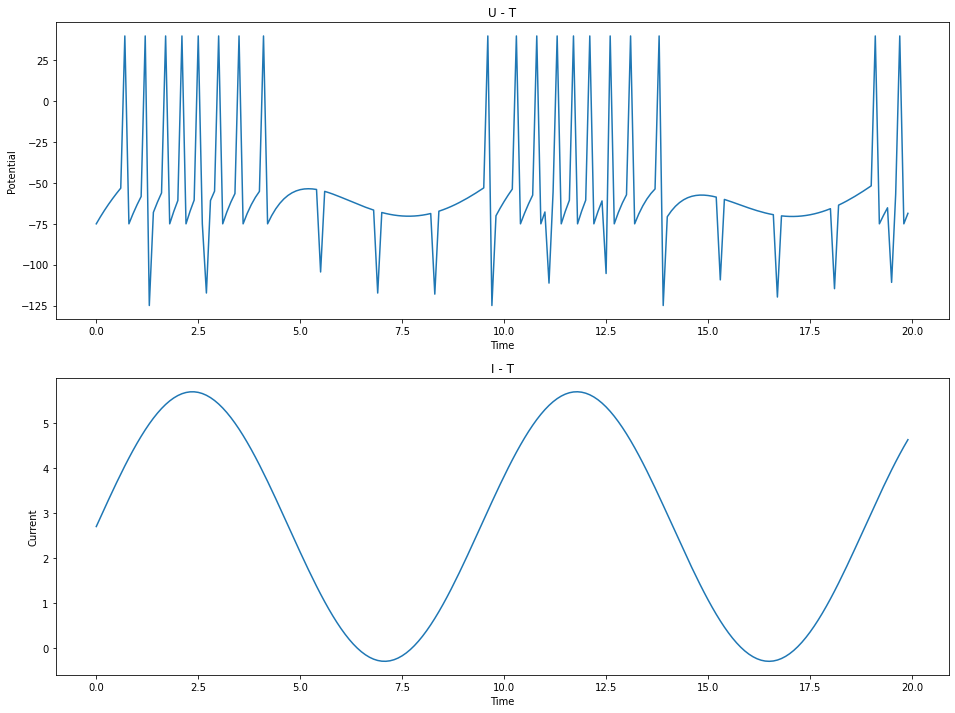

In [55]:
neuron1.plot()

<Figure size 1152x864 with 0 Axes>

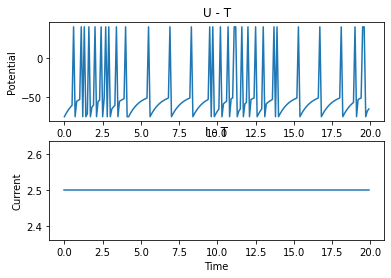

In [56]:
neuron2.plot()

### inhibitory - inhibitory

In [57]:
neuron1 = LIF(1,I_lst=sin_current(),n_type='inh')
neuron2 = LIF(2,I_lst=2.5 , n_type='inh')

In [58]:
neurons = [neuron1, neuron2]
connections = [[1], [0]]
neurons_group = NeuronsGroup(neurons, connections , excw=50, inhw=-50)
neurons_group.start()

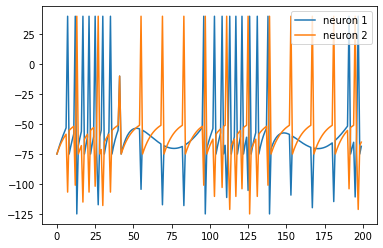

In [59]:
neurons_group.neurons_u_plot()

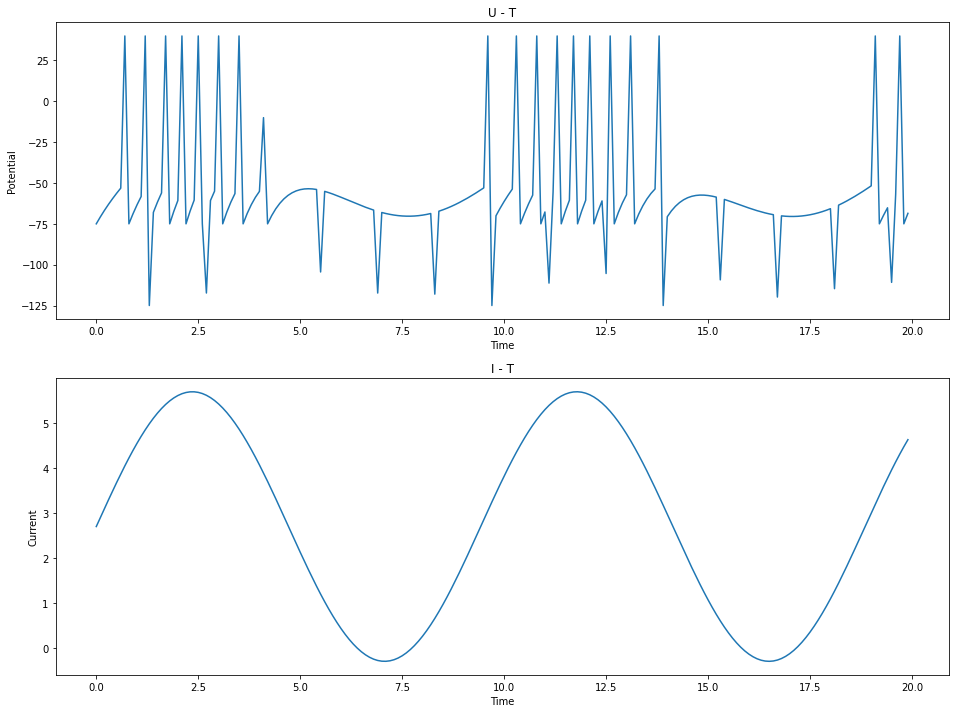

In [60]:
neuron1.plot()

<Figure size 1152x864 with 0 Axes>

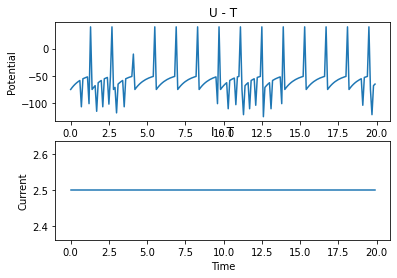

In [61]:
neuron2.plot()

# Task 2

In [62]:
neurons = []
connections = []
for i in range(10):
    if i <= 1:
        a = LIF(i , I_lst = sin_current(), n_type='inh')
        neurons.append(a)
    else:
        a = LIF(i , I_lst = 2.5, n_type='exc')
        neurons.append(a)
    lst=[]
    for j in range(10):
        lst.append(j)
    lst.remove(i)
    connections.append(lst)

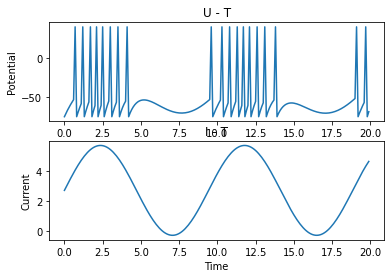

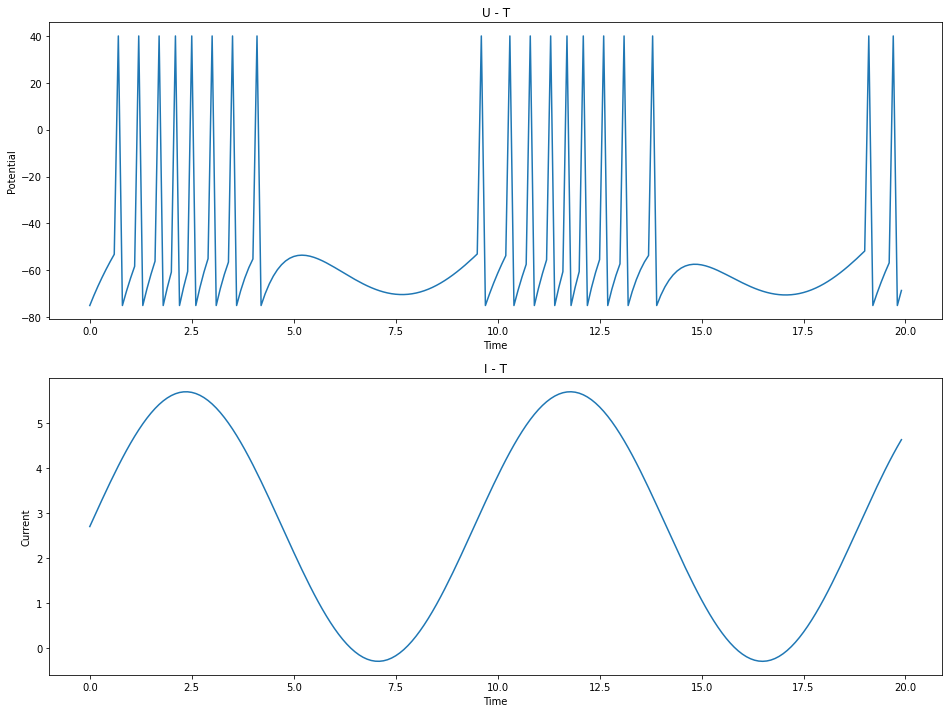

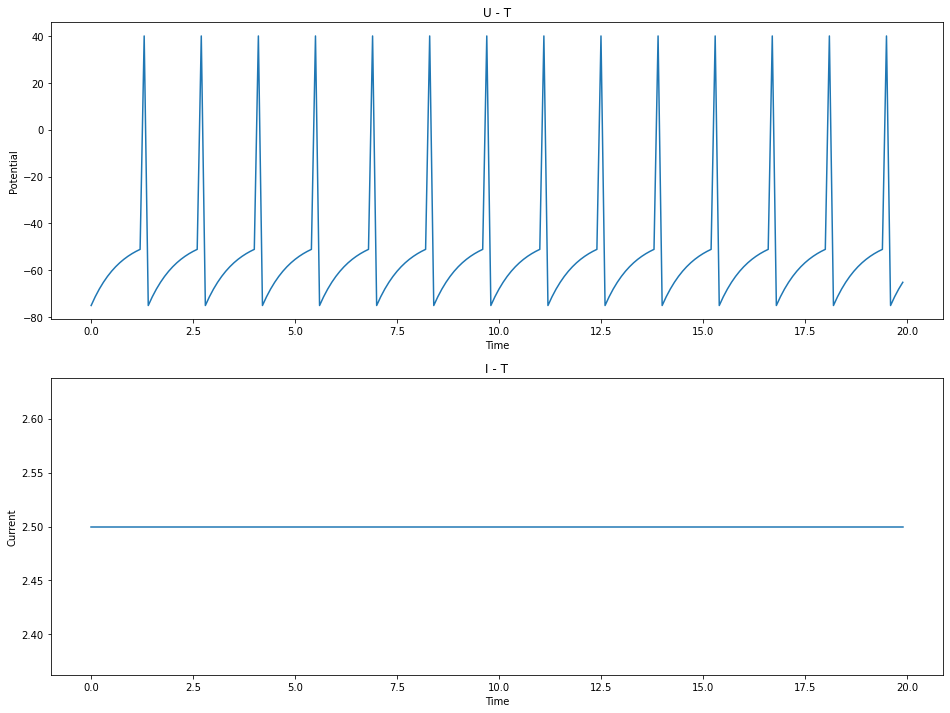

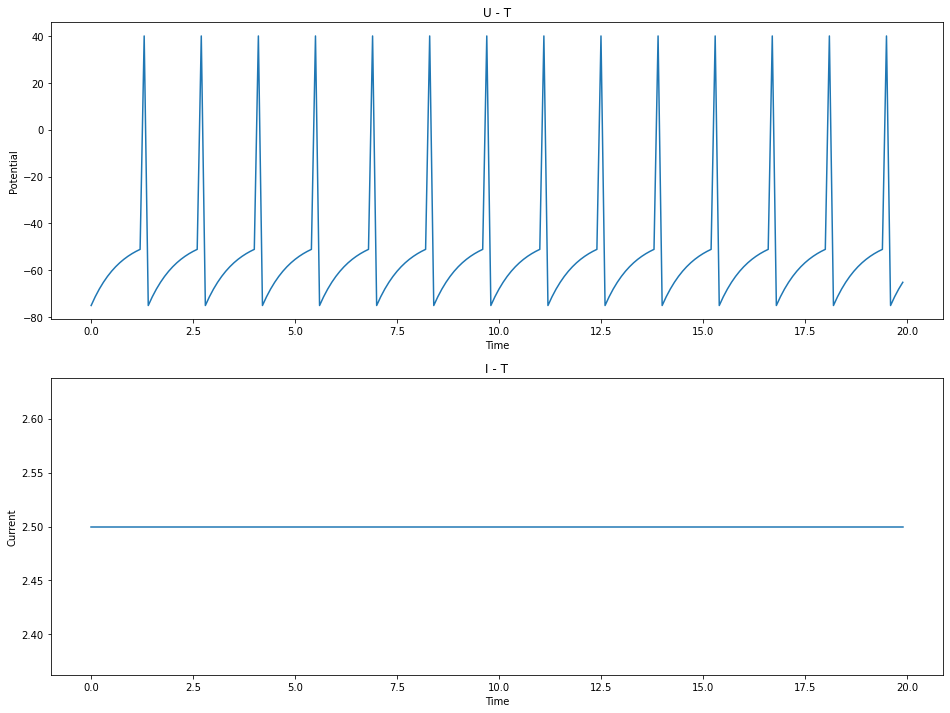

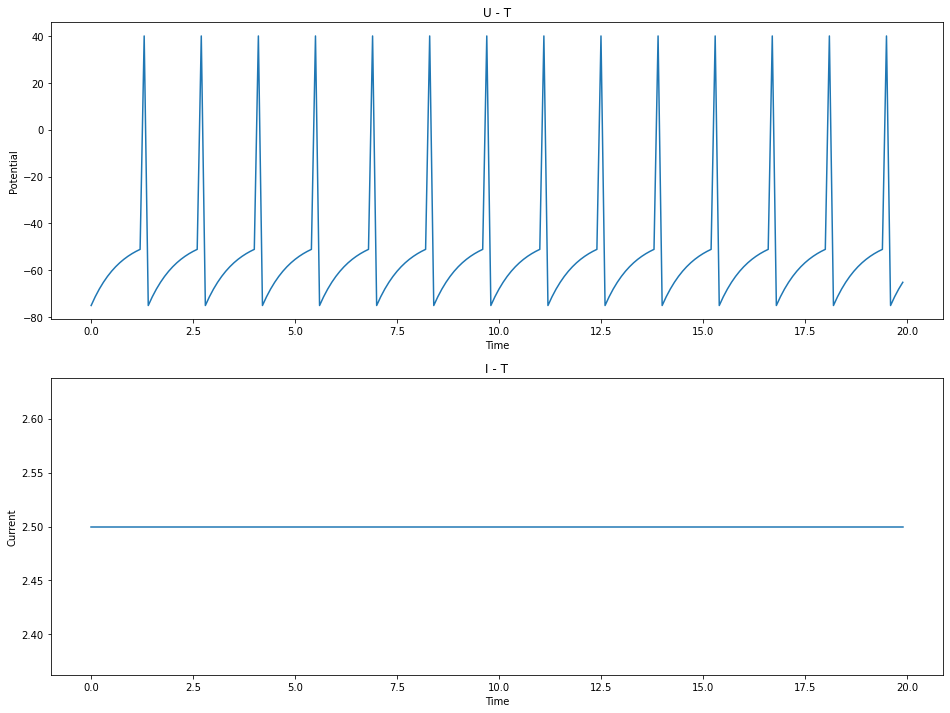

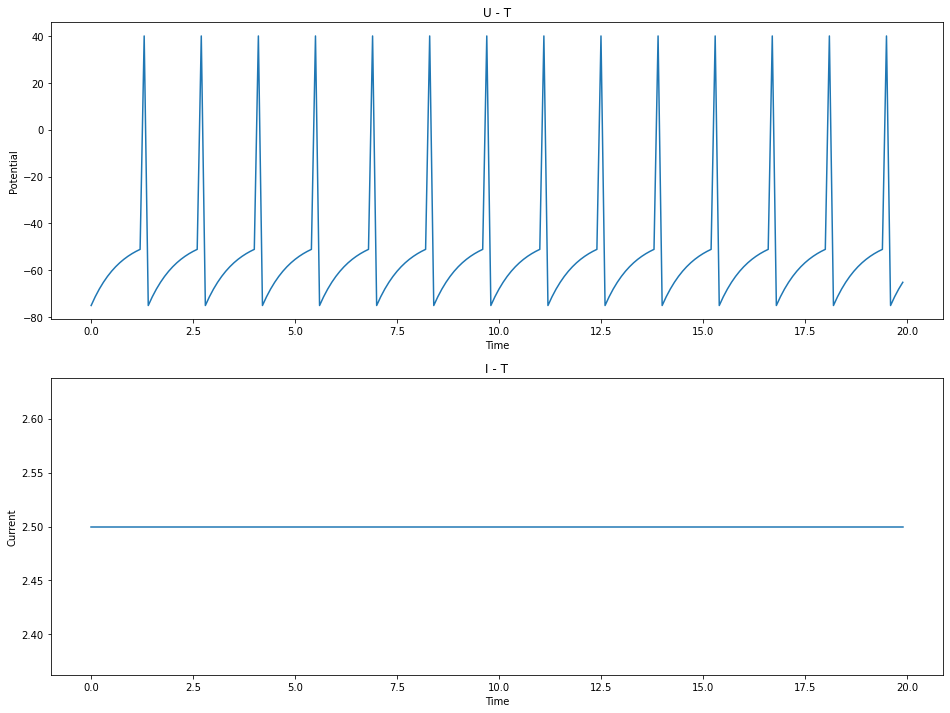

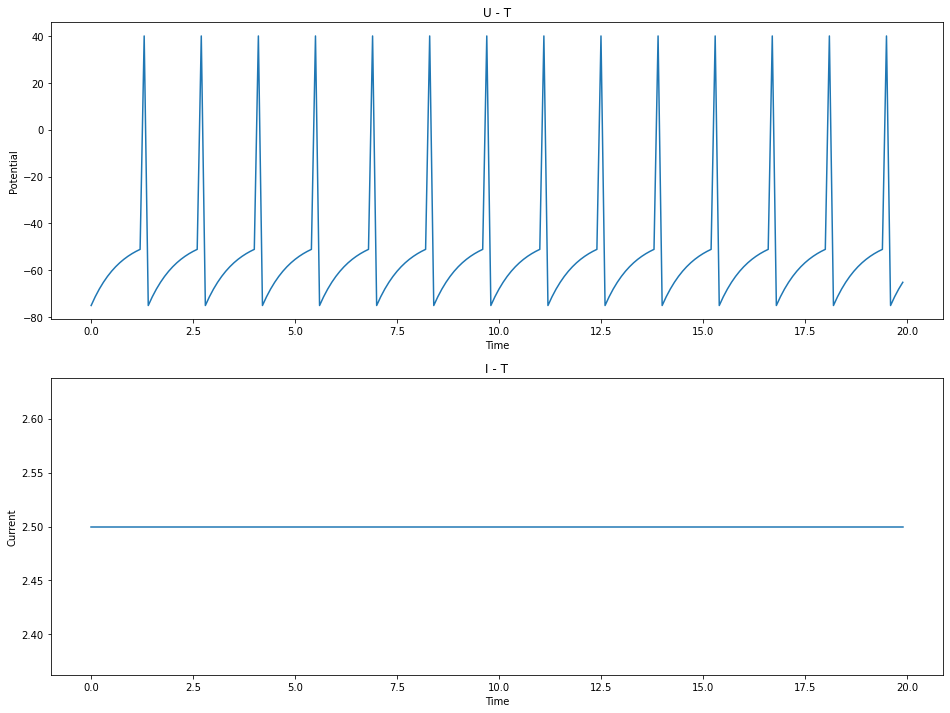

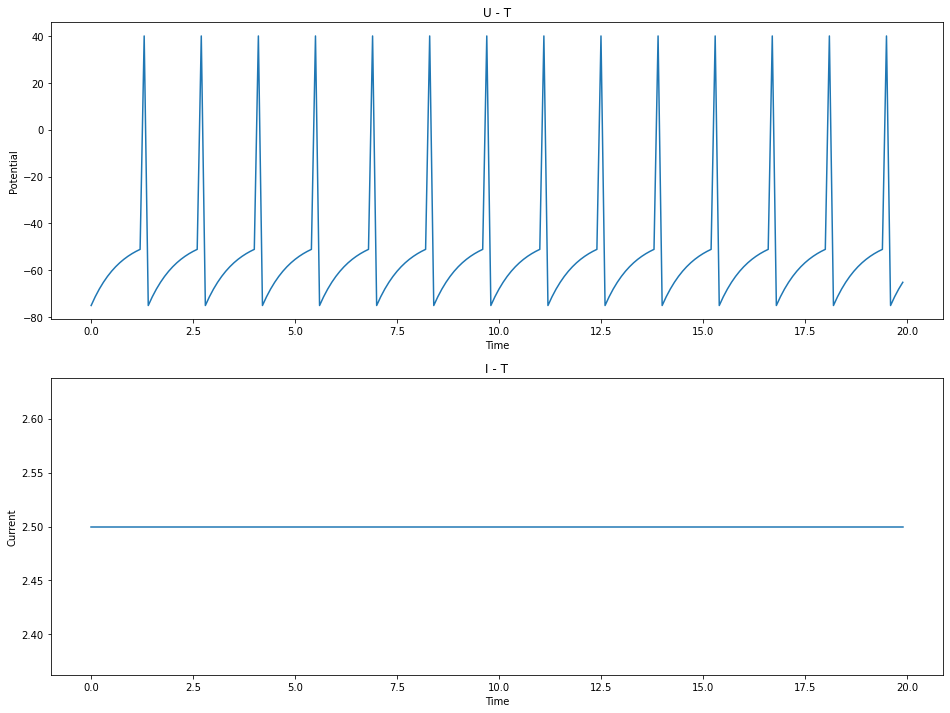

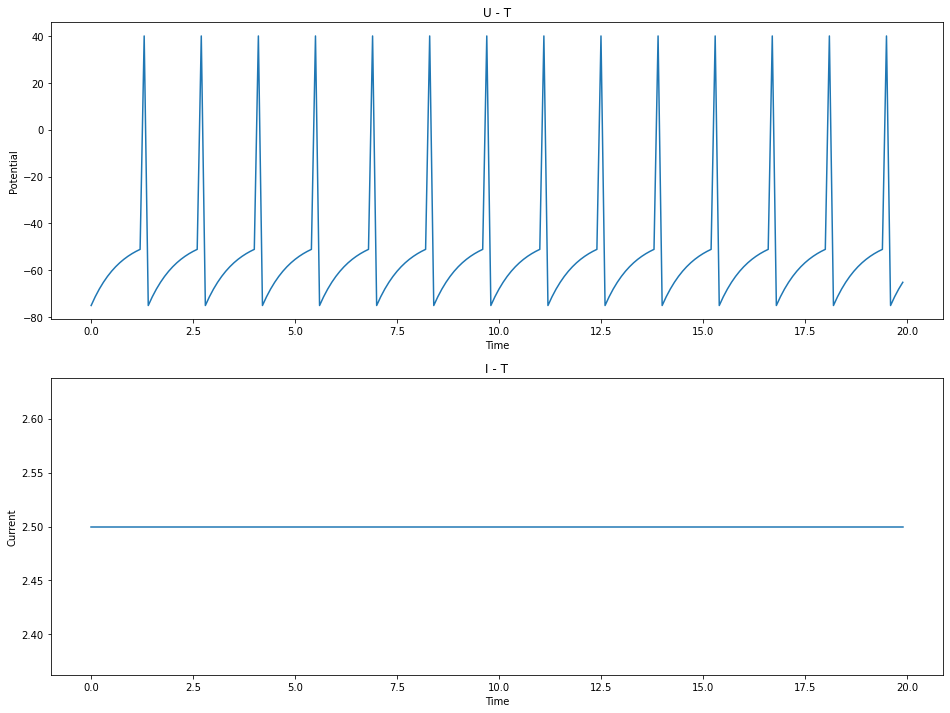

<Figure size 1152x864 with 0 Axes>

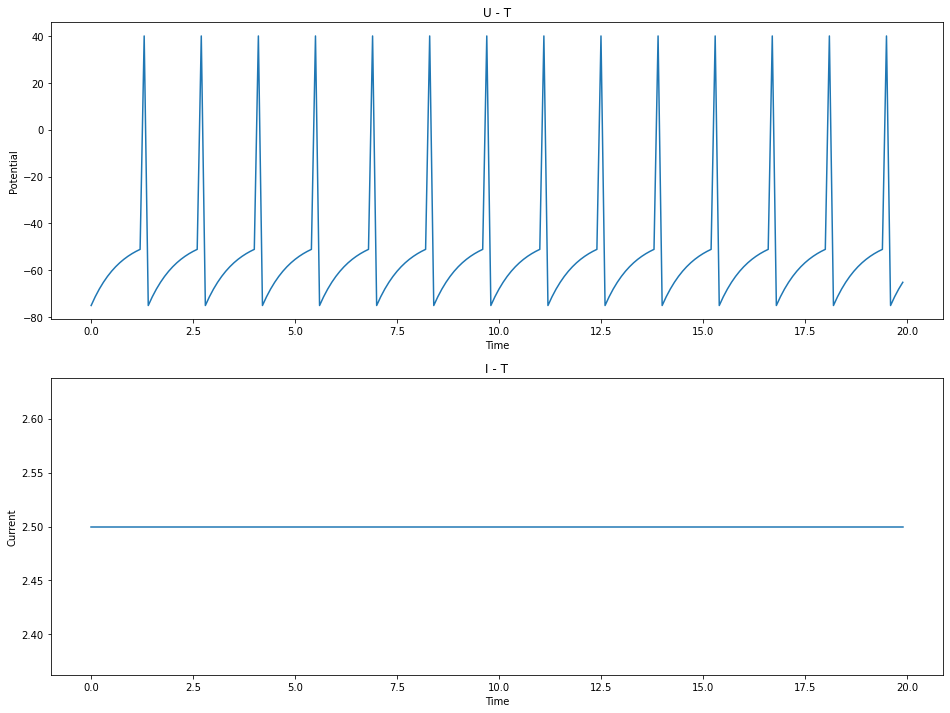

In [63]:
for i in range(10):
    neurons[i].plot()

In [64]:
neurons_group = NeuronsGroup(neurons, connections,excw=20, inhw=-20)
neurons_group.start()

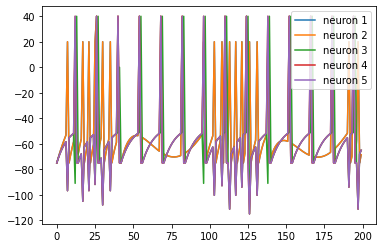

In [65]:
neurons_group.neurons_u_plot()

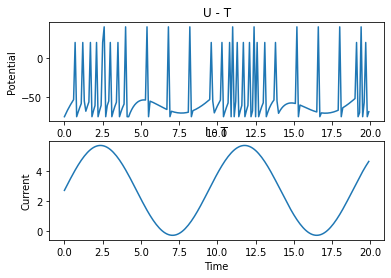

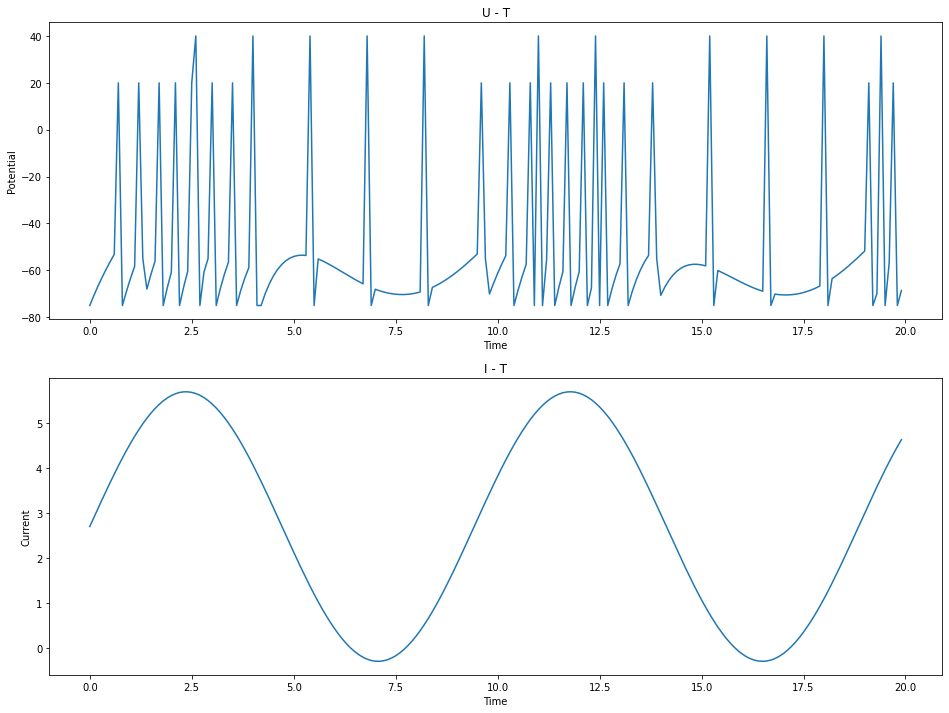

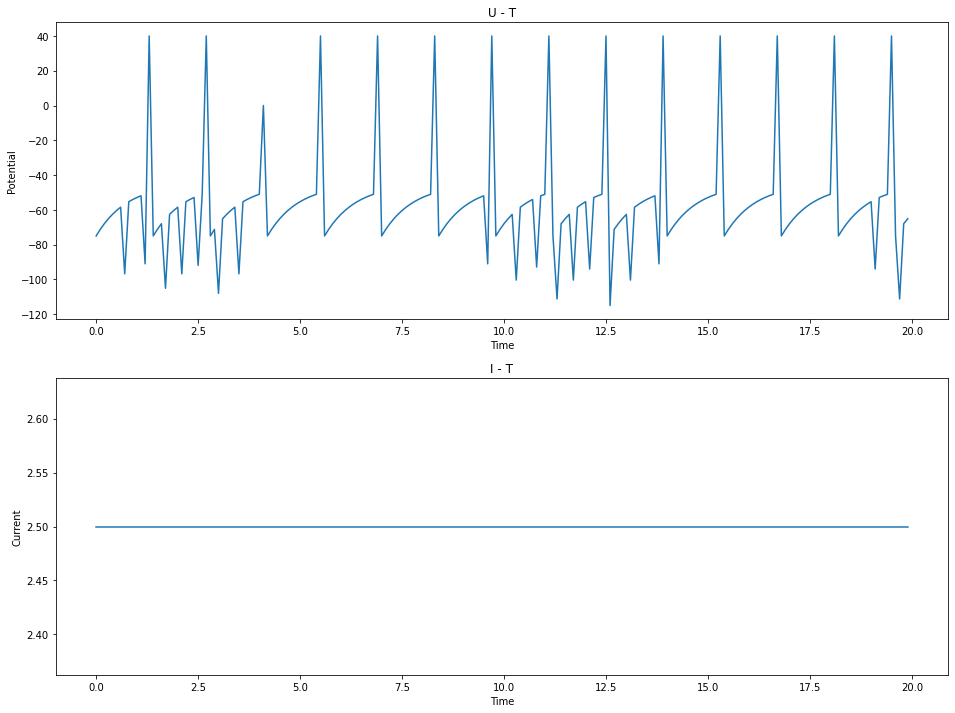

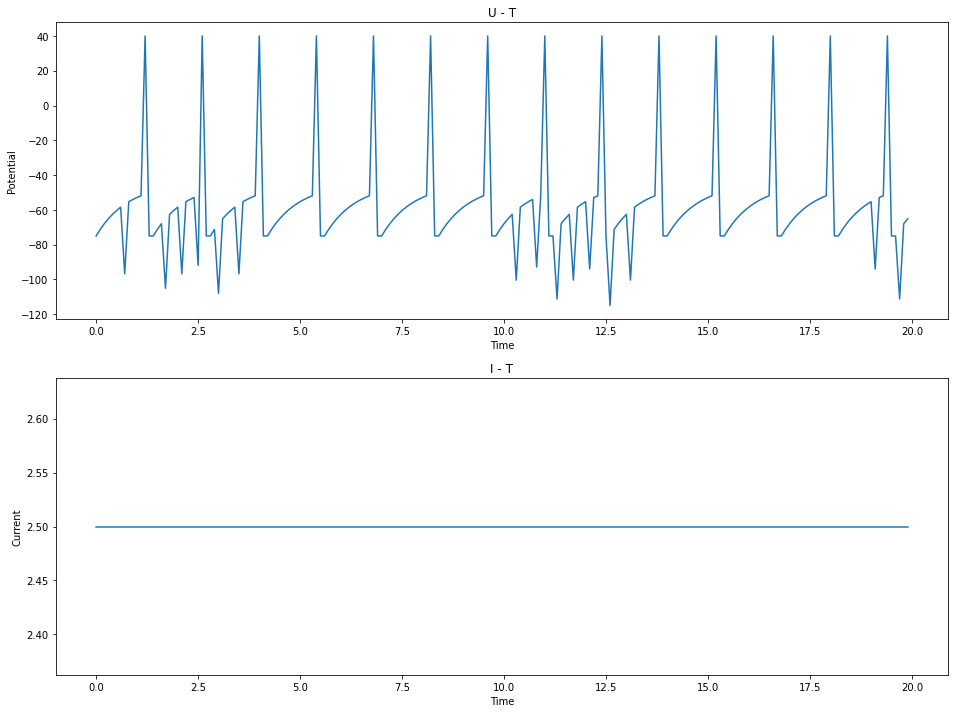

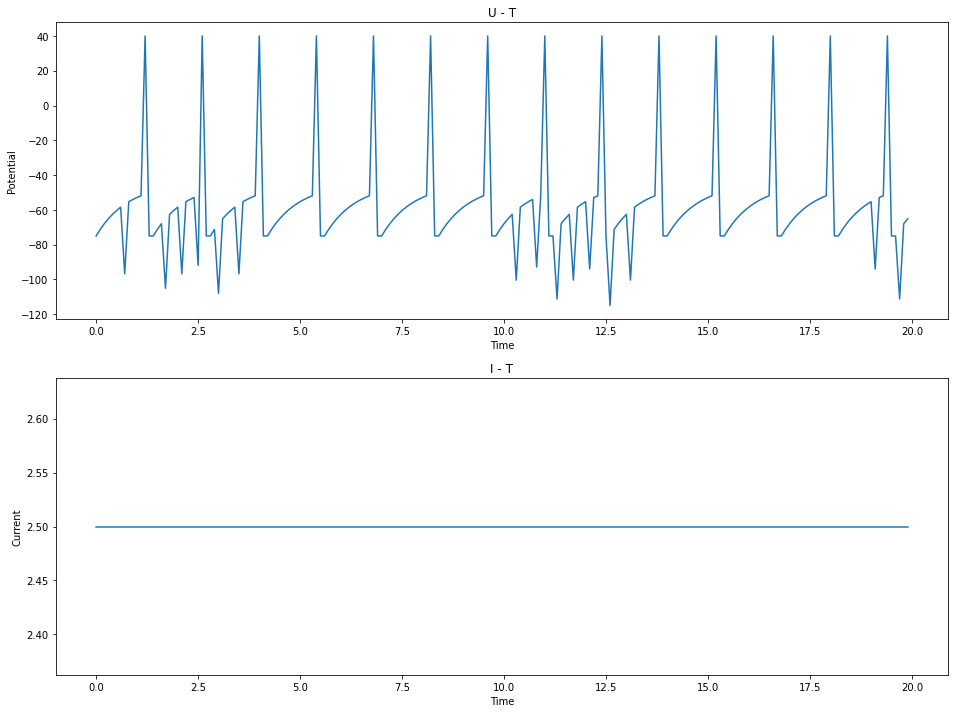

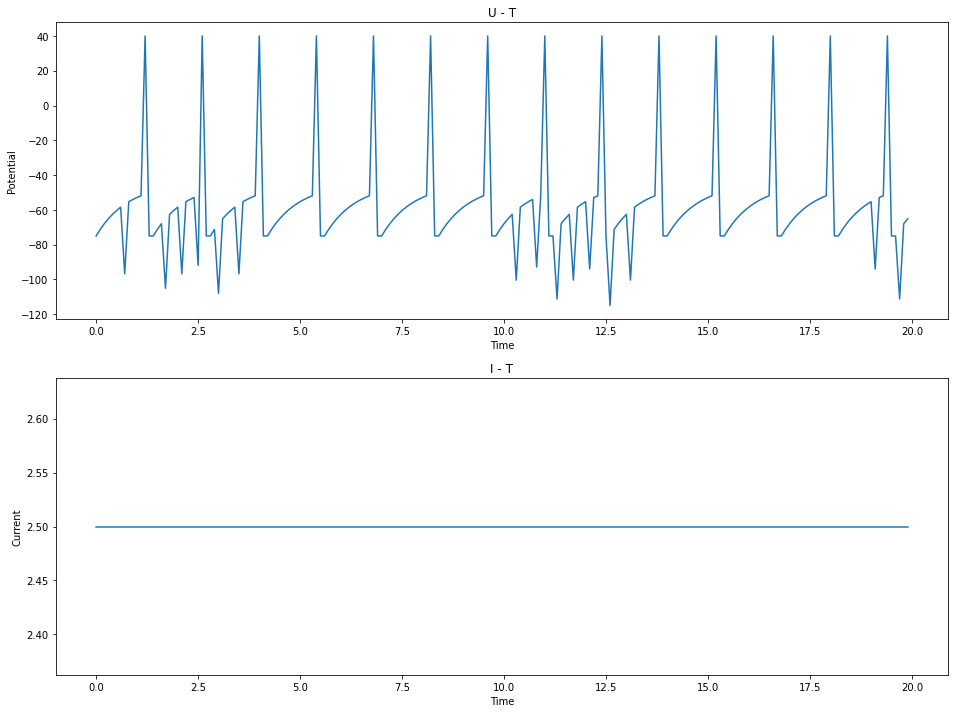

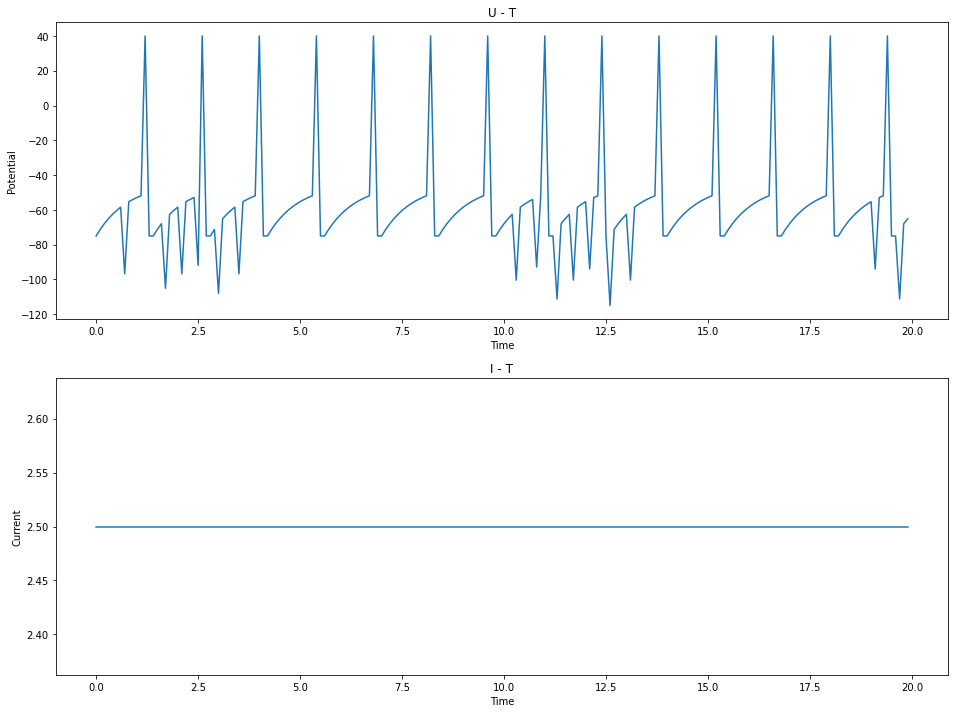

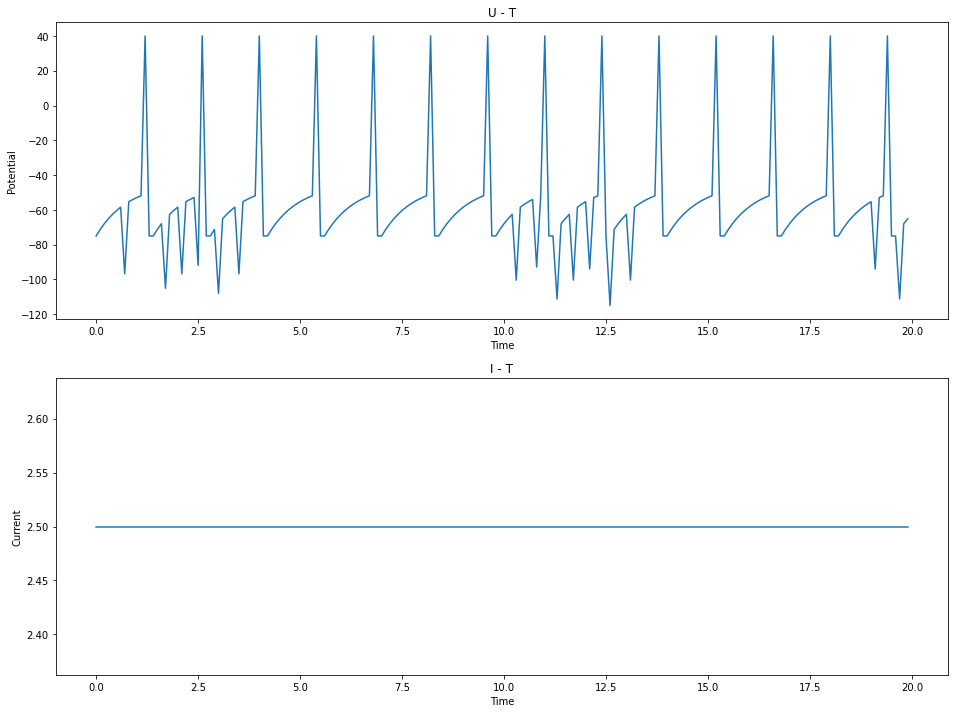

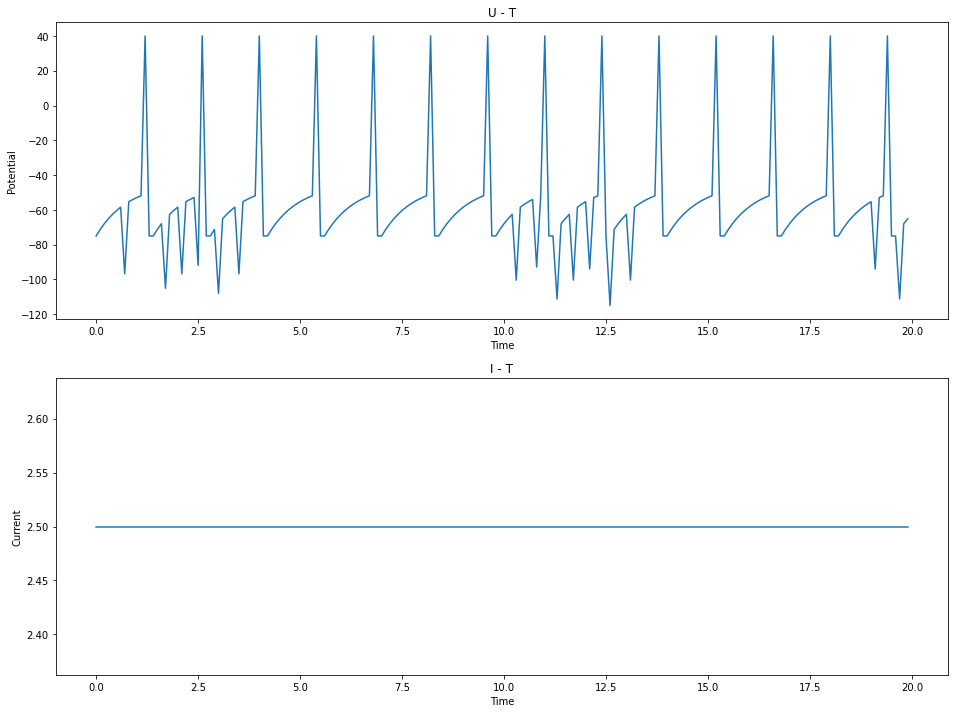

<Figure size 1152x864 with 0 Axes>

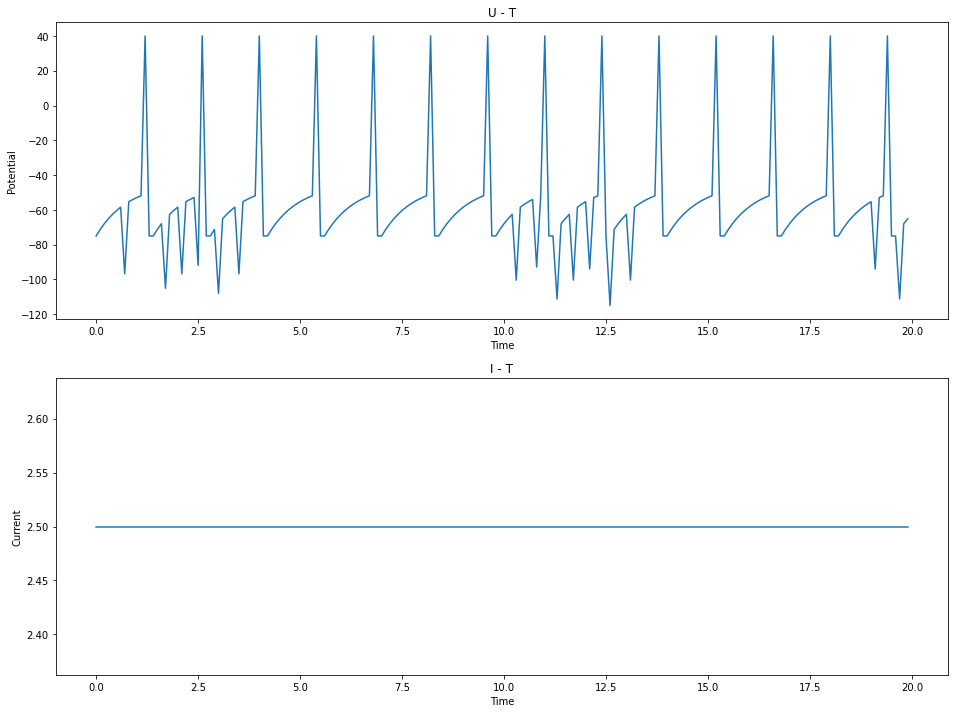

In [66]:
for i in range(10):
    neurons[i].plot()

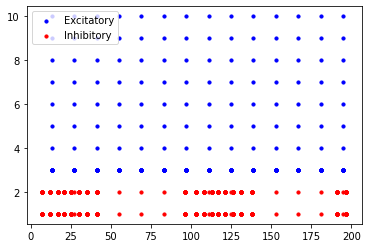

In [67]:
neurons_group.raster_plot()

# Task 3

In [68]:
def x_current():
    arr = np.empty(200)
    for i in range(200):
        arr[i] = i/50
    return arr

In [69]:
neurons = []
connections = []

for i in range(10):
    a = LIF(i+1 , I_lst =sin_current())
    neurons.append(a)
    temp_connections = []
    for j in range(5):
        temp_connections.append(j+10)
    for j in range(5):
        temp_connections.append(j+20)
    connections.append(temp_connections)

for i in range(10):
    a = LIF(i+11 , I_lst = 2.5)
    neurons.append(a)
    temp_conncetions = []
    for j in range(5):
        temp_connections.append(j)
    for j in range(5):
        temp_connections.append(j+20)
    connections.append(temp_connections)

for i in range(10):
    a = LIF(i+21 , I_lst=2.75 , n_type='inh')
    neurons.append(a)
    temp_connections = []
    for j in range(5):
        temp_connections.append(j)
    for j in range(5):
        temp_connections.append(j+10)
    connections.append(temp_connections)

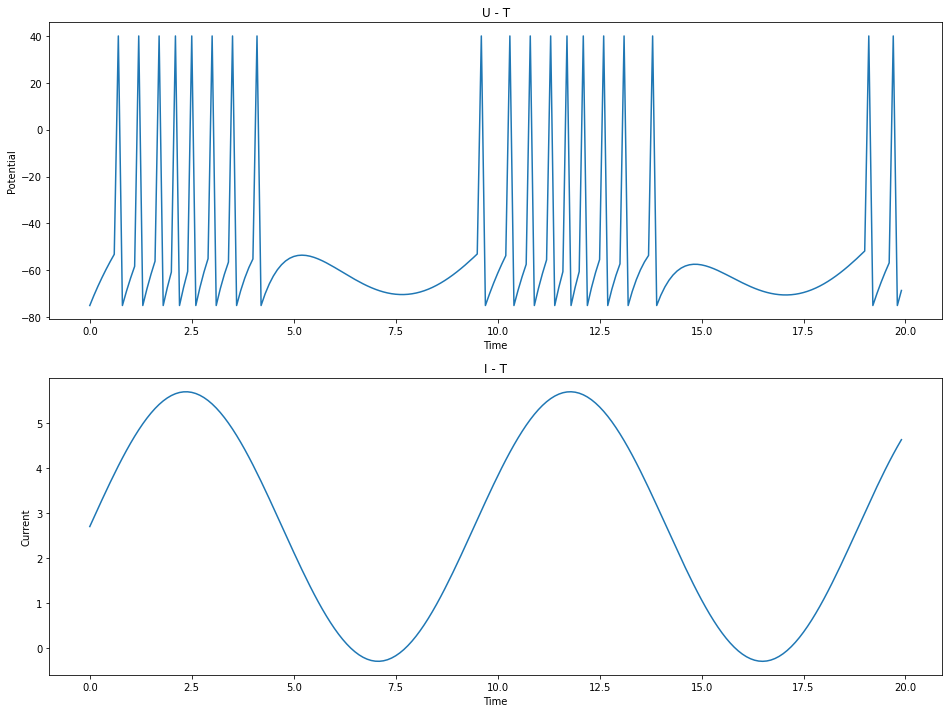

<Figure size 1152x864 with 0 Axes>

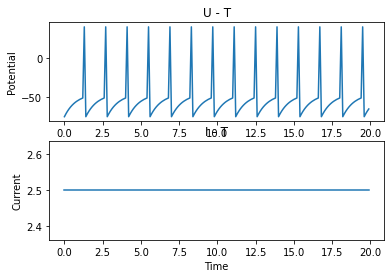

<Figure size 1152x864 with 0 Axes>

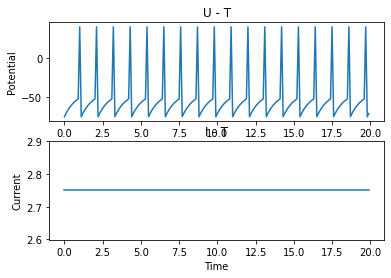

In [70]:
for i in range(3):
    neurons[i * 10].plot()

In [71]:
neurons_group = NeuronsGroup(neurons, connections,excw=1, inhw=-1)
neurons_group.start()

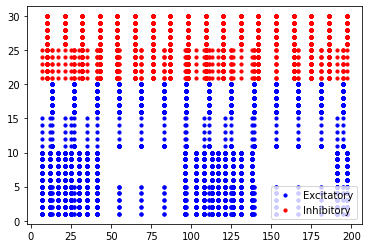

In [72]:
neurons_group.raster_plot()

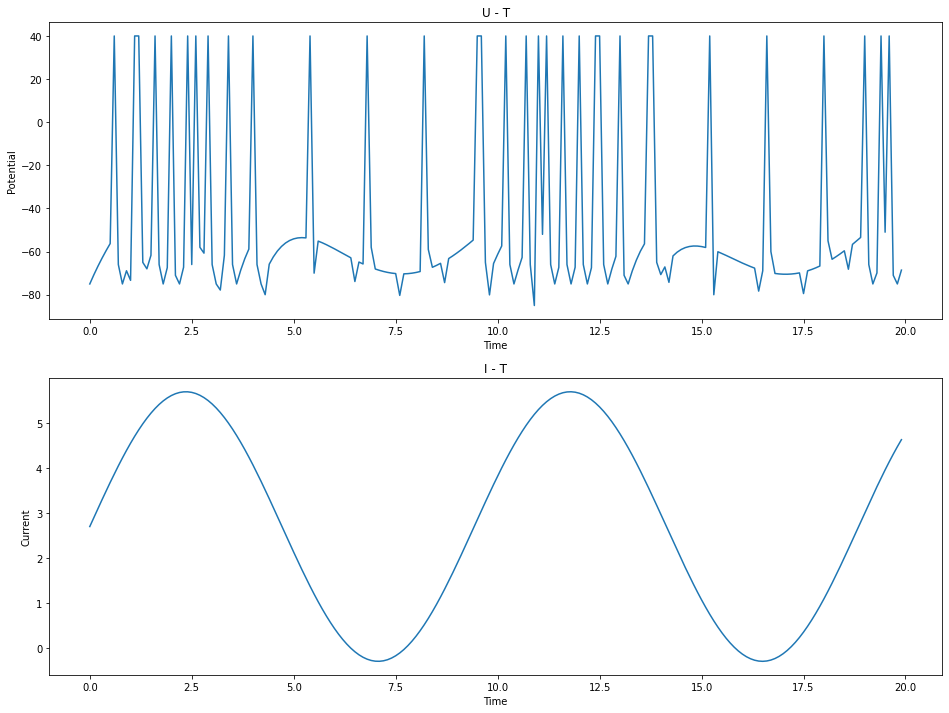

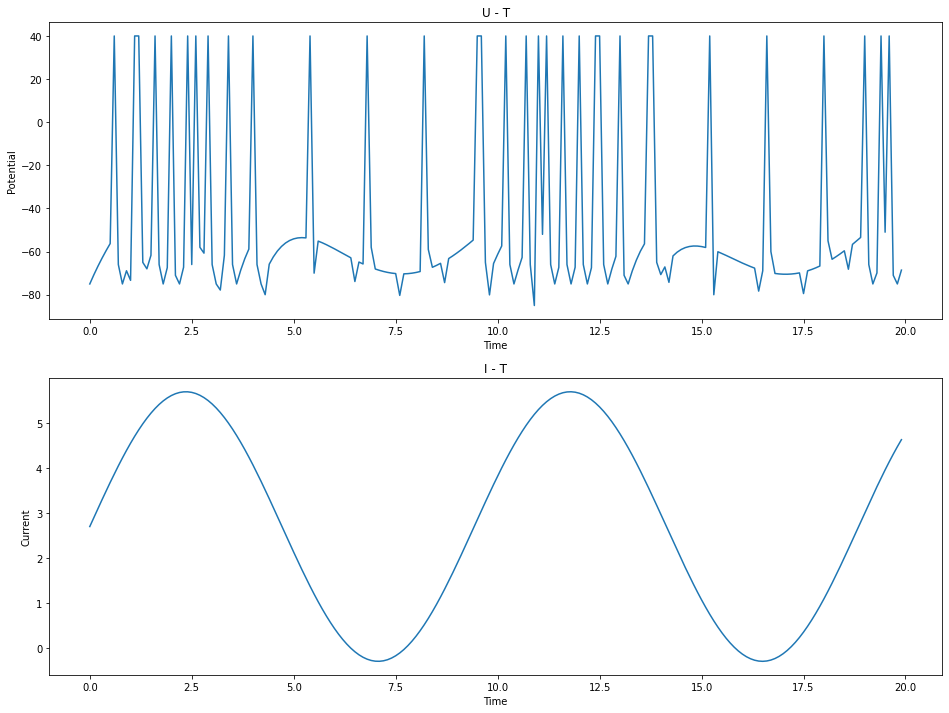

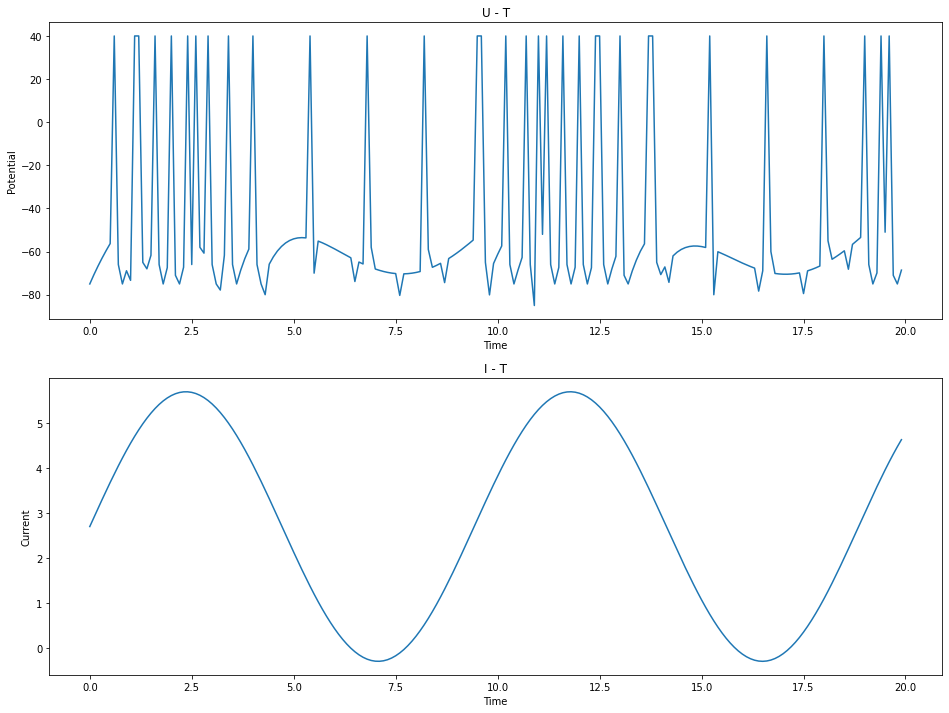

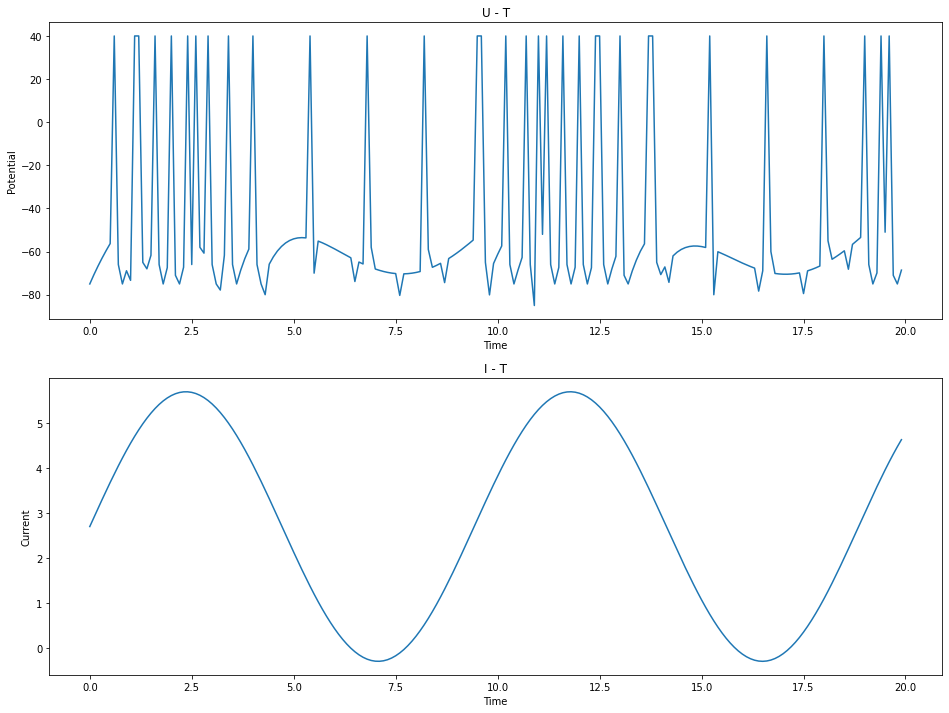

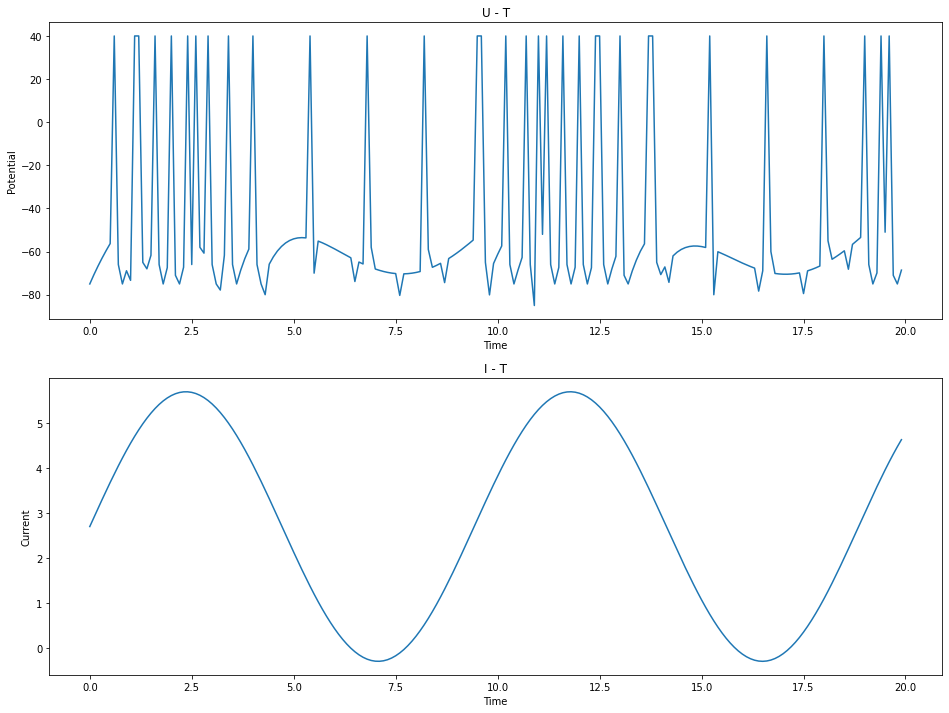

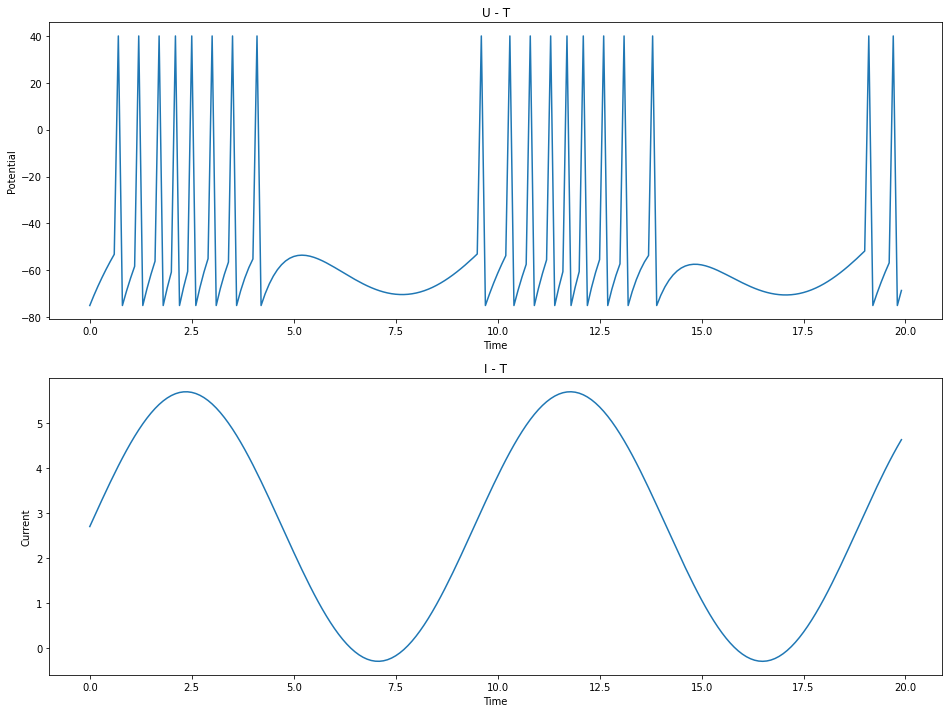

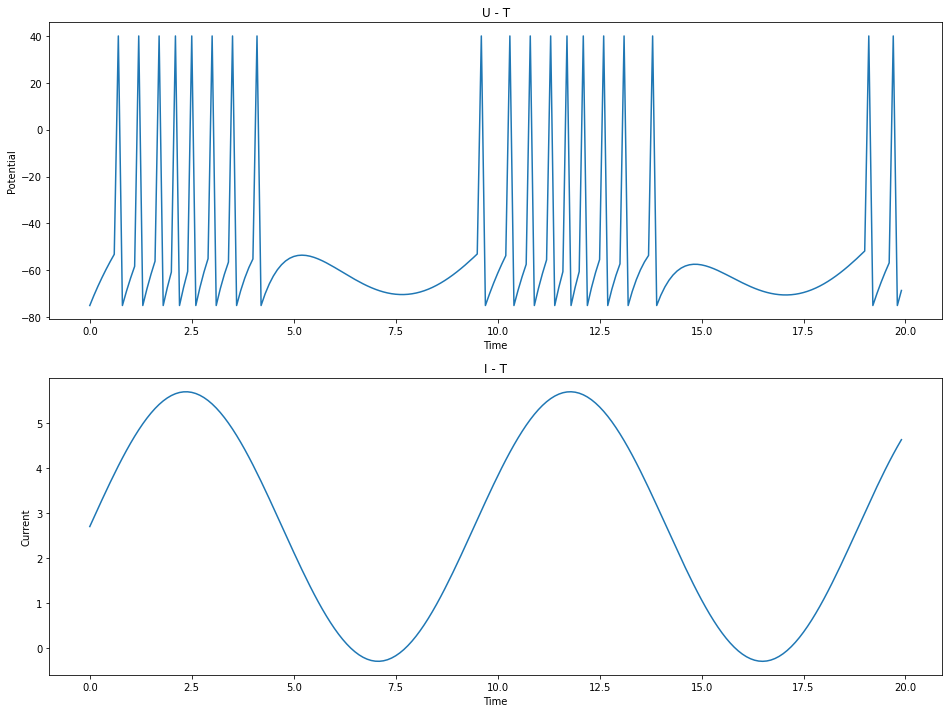

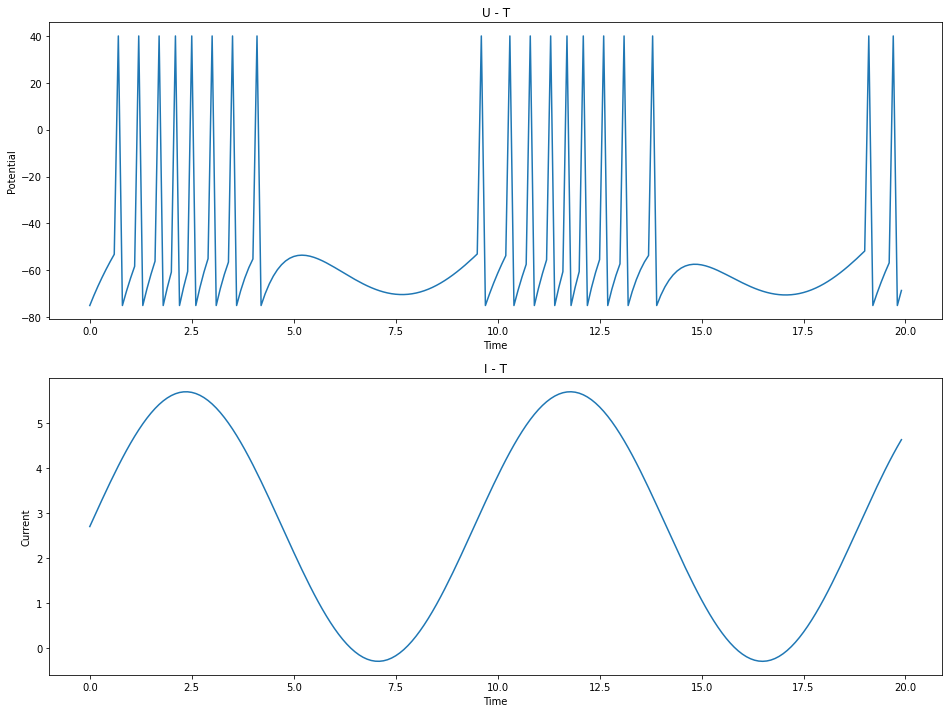

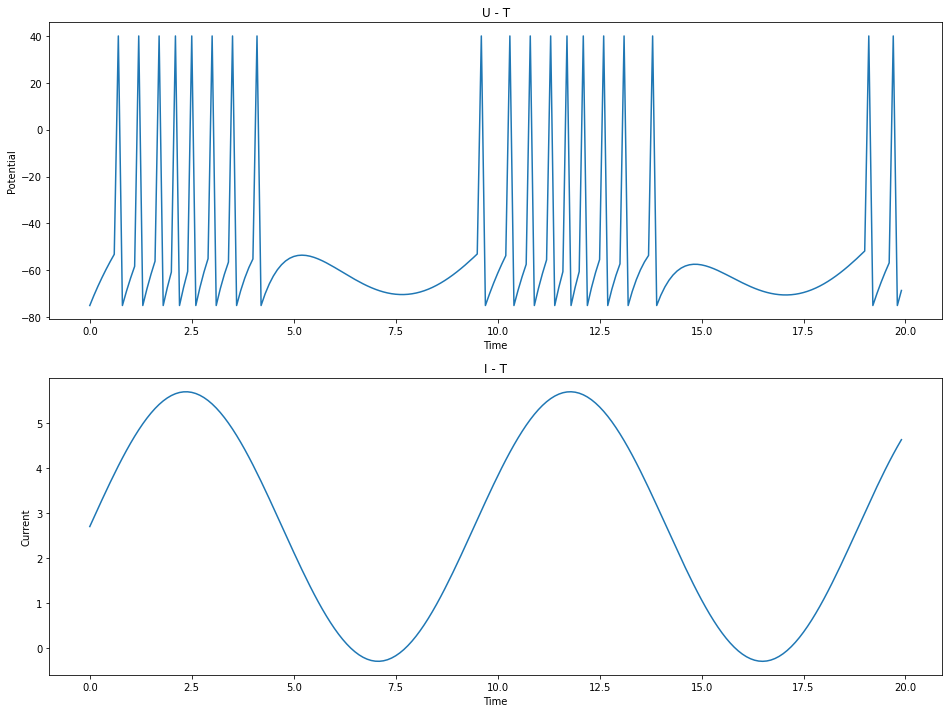

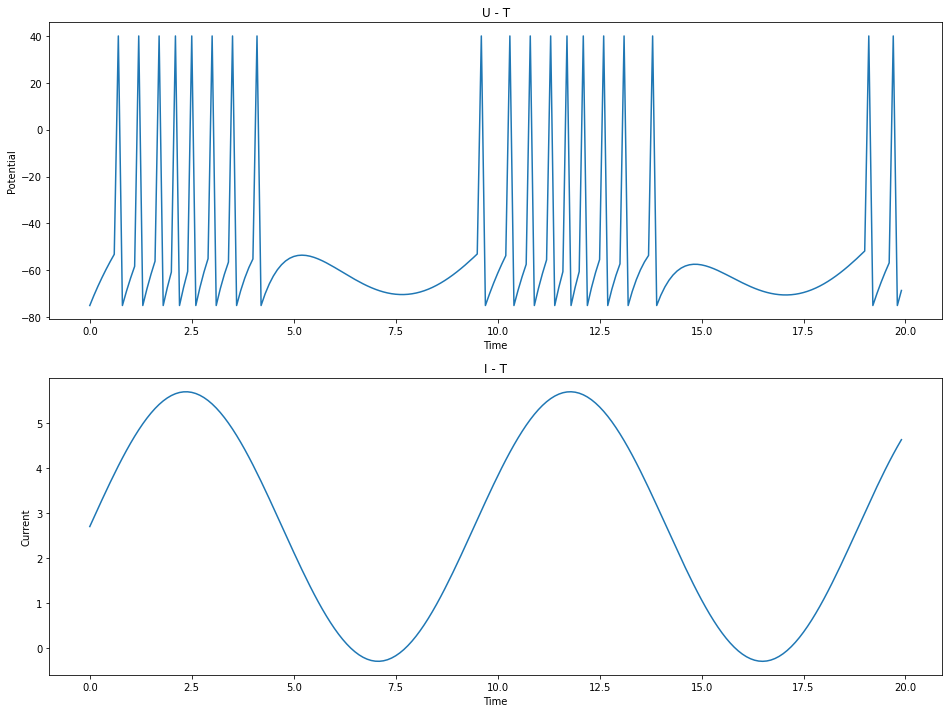

In [73]:
for i in range(10):
    neurons[i].plot()

<Figure size 1152x864 with 0 Axes>

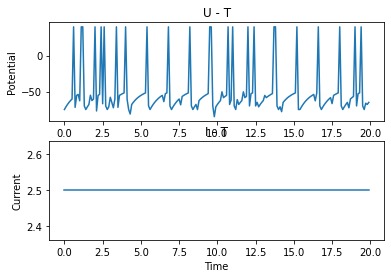

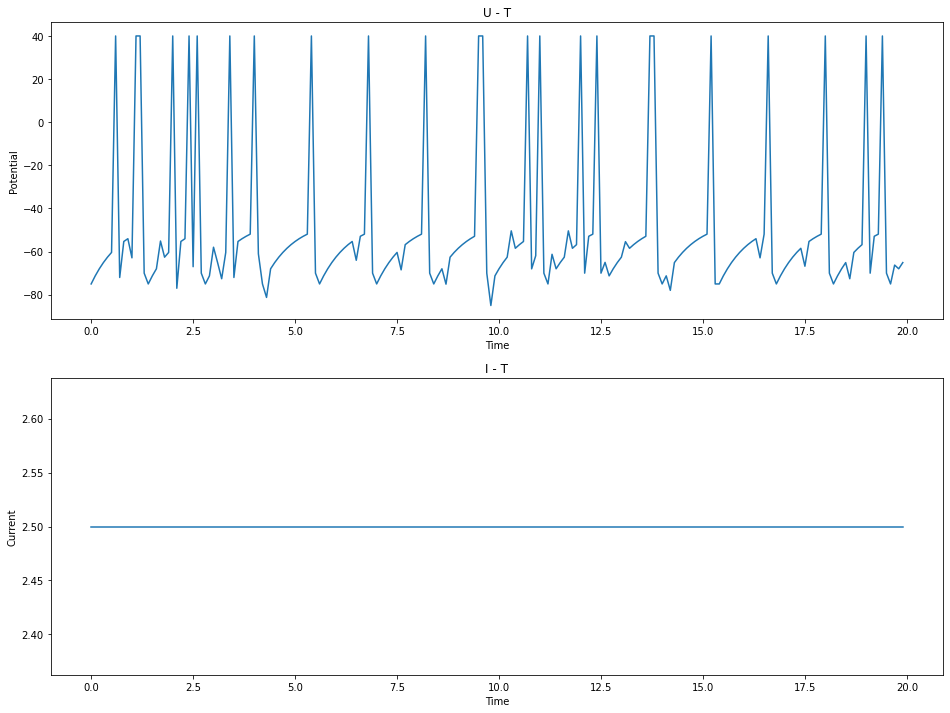

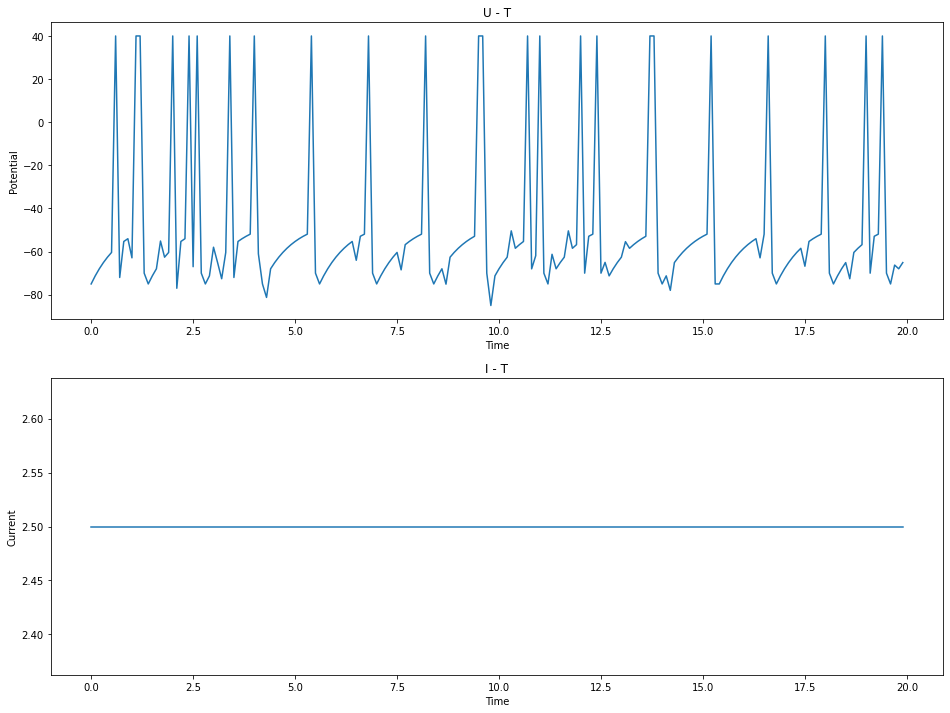

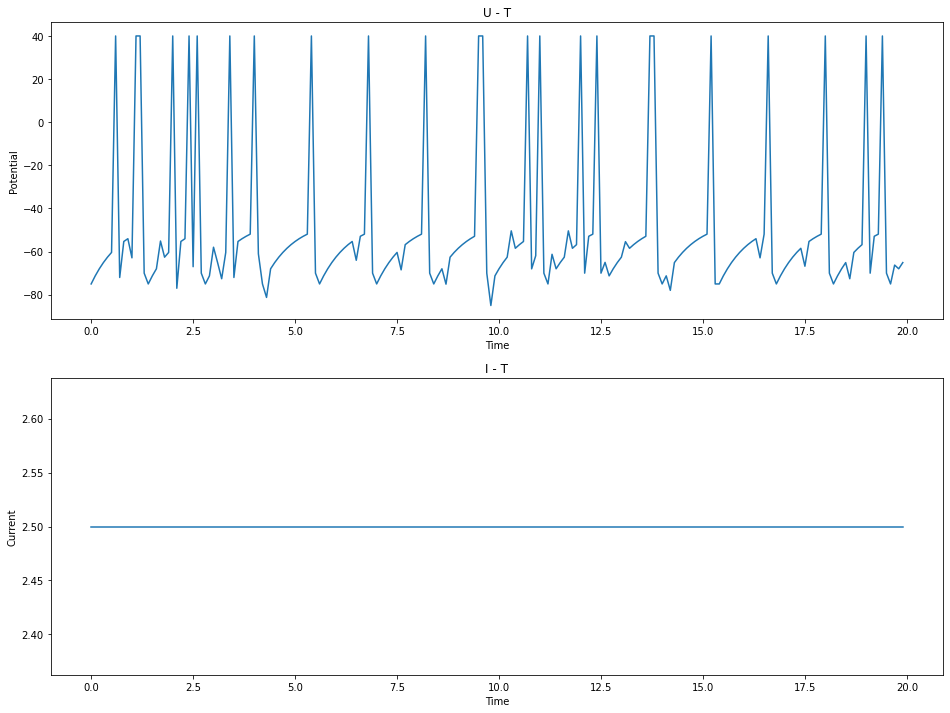

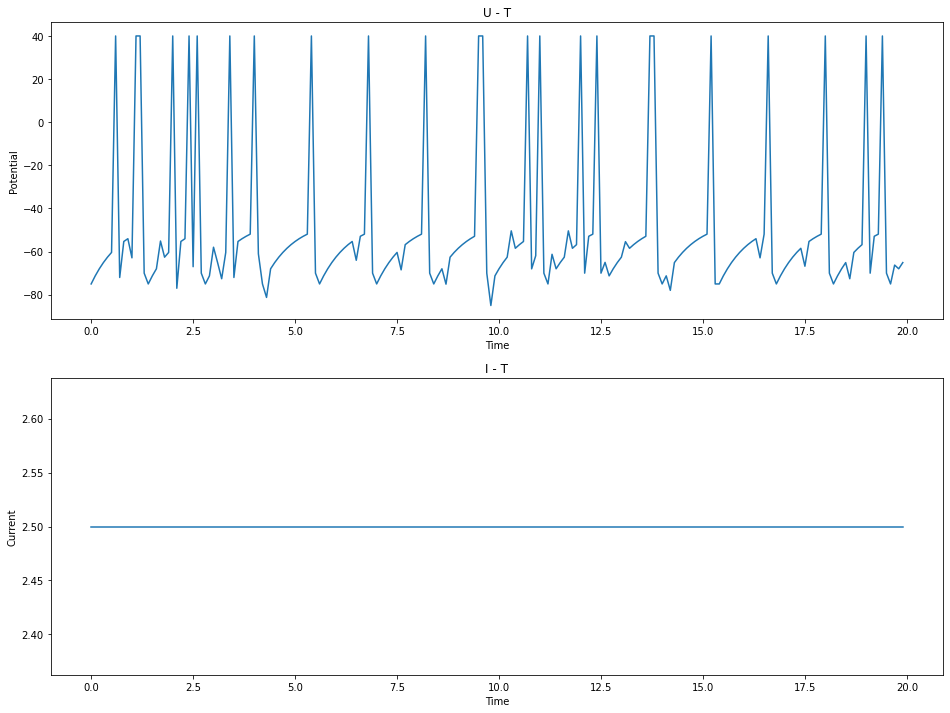

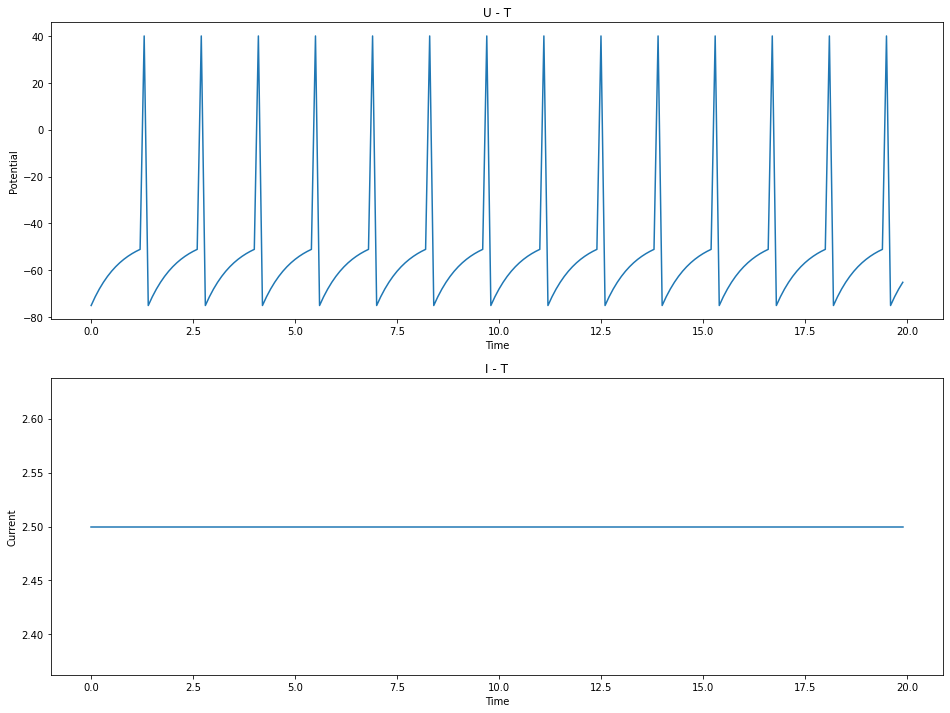

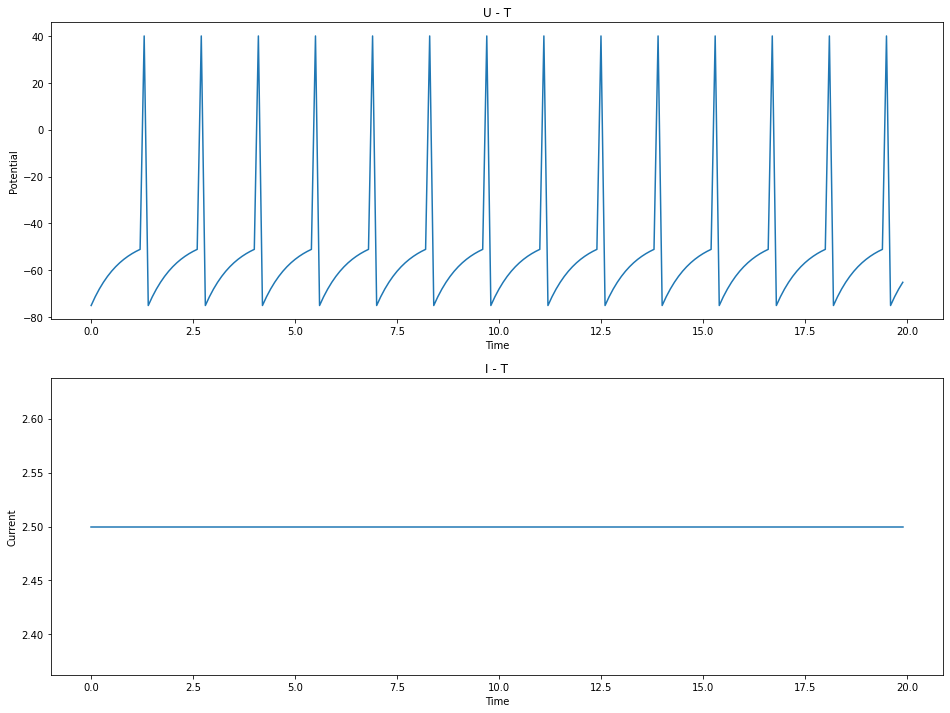

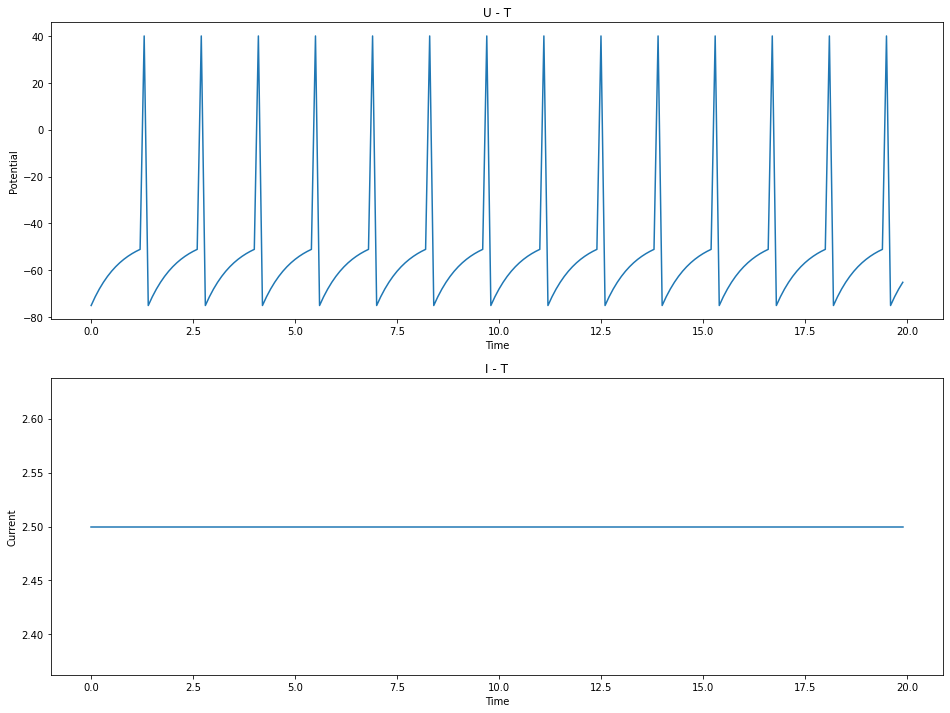

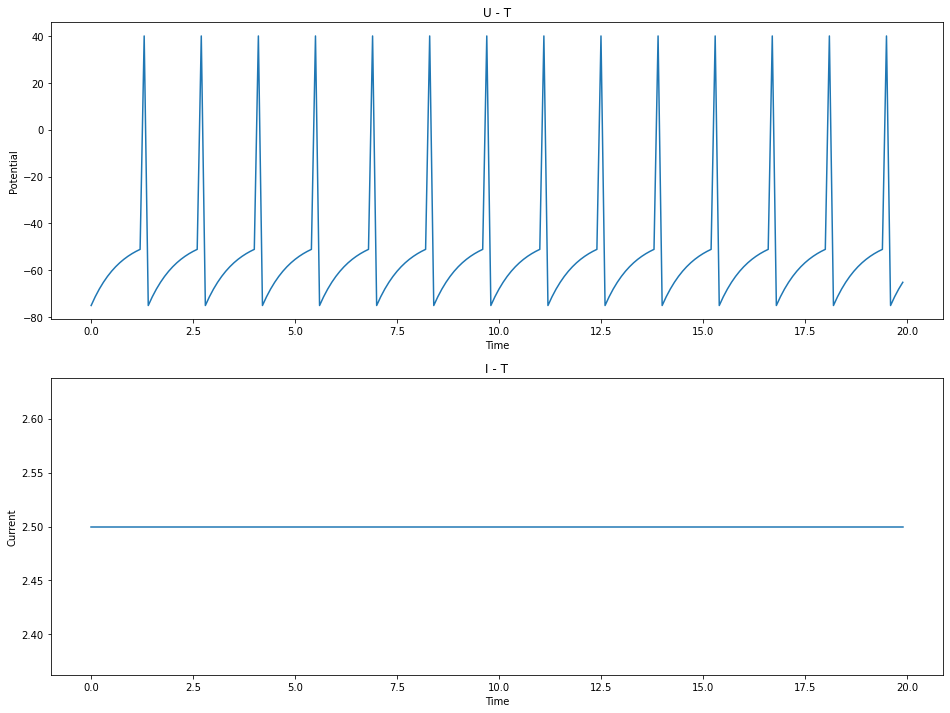

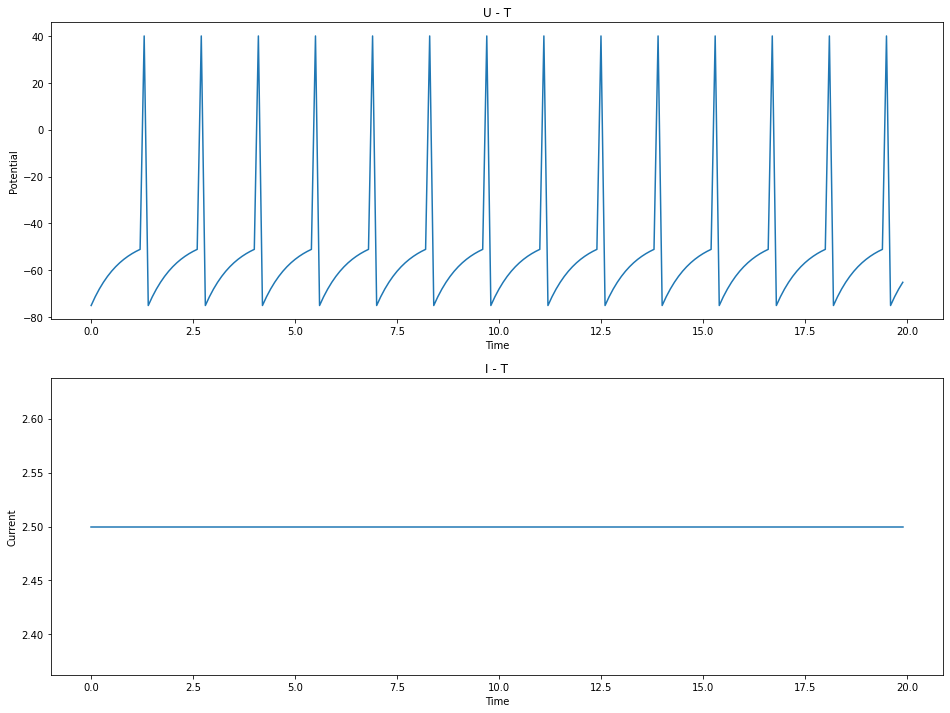

In [74]:
for i in range(10):
    neurons[i + 10].plot()

<Figure size 1152x864 with 0 Axes>

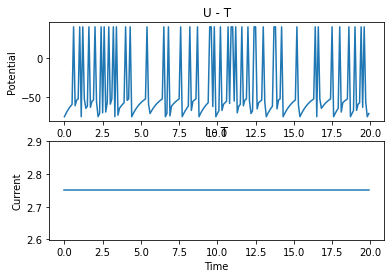

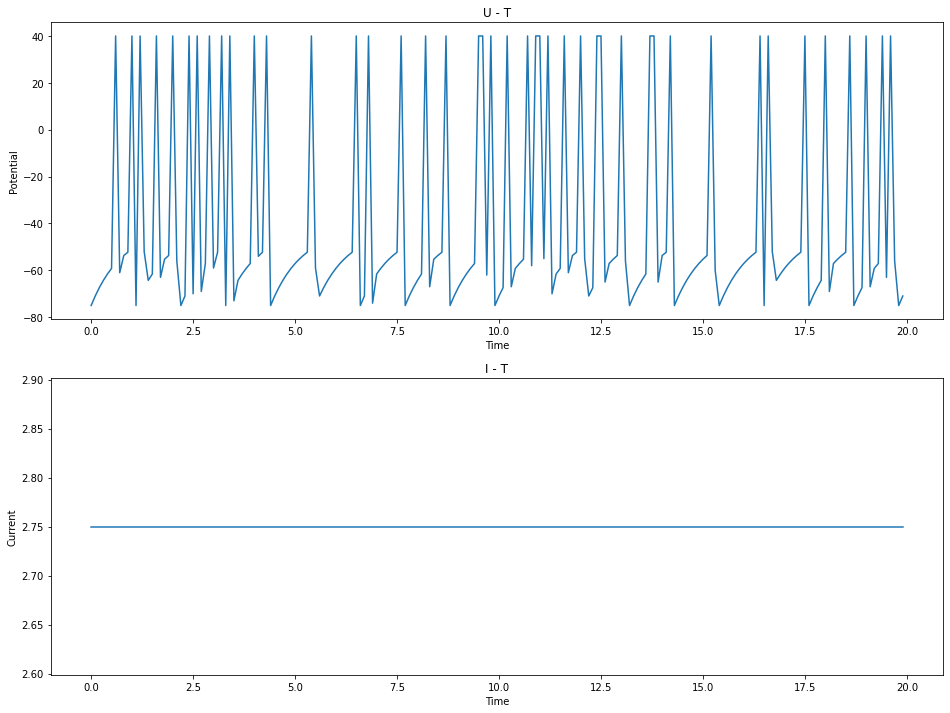

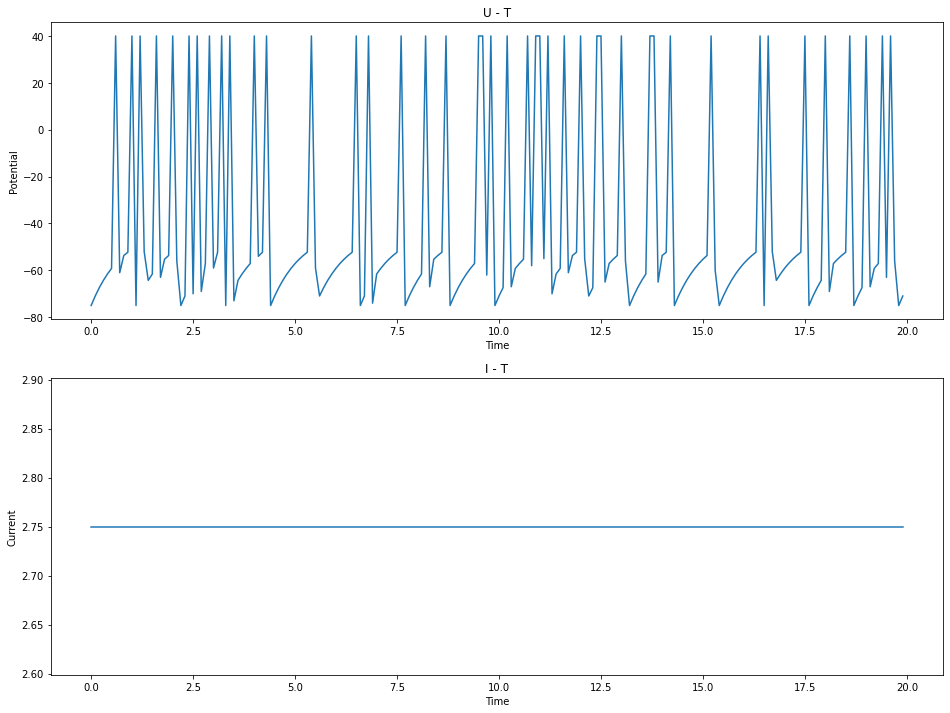

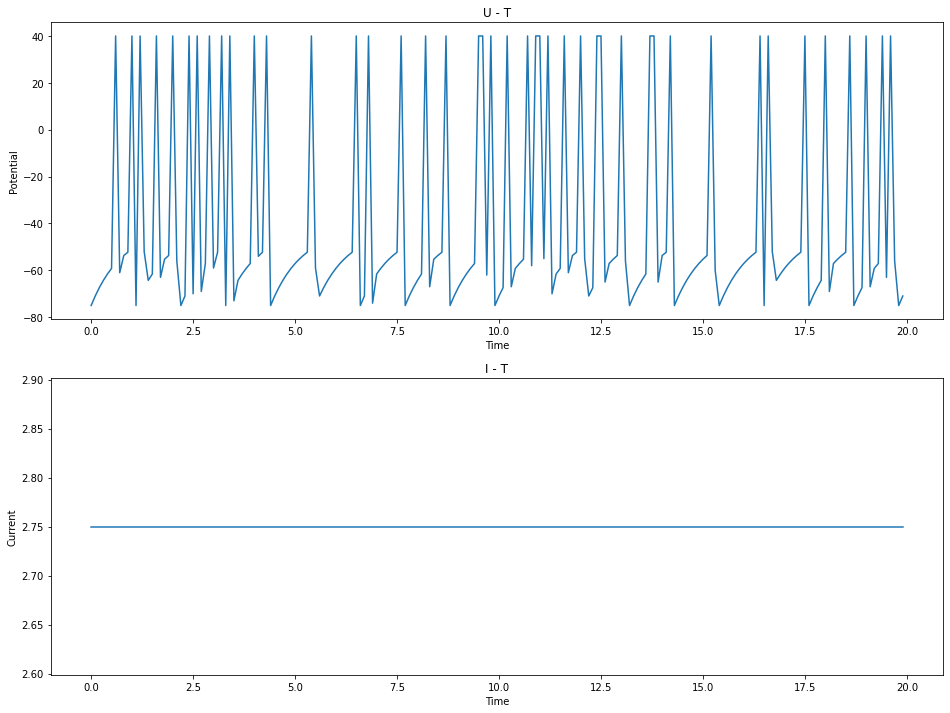

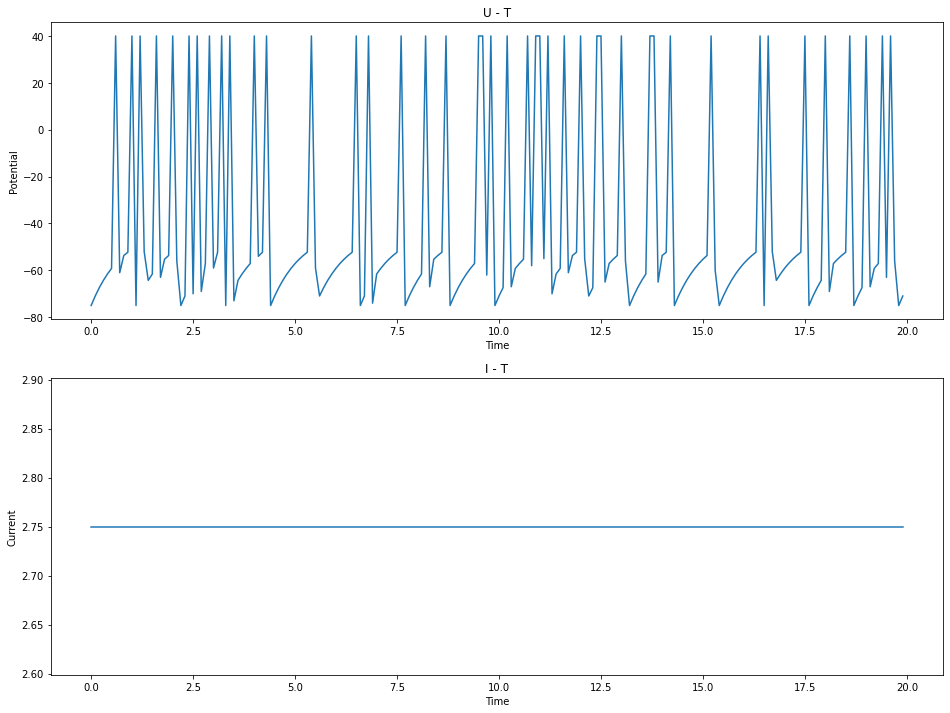

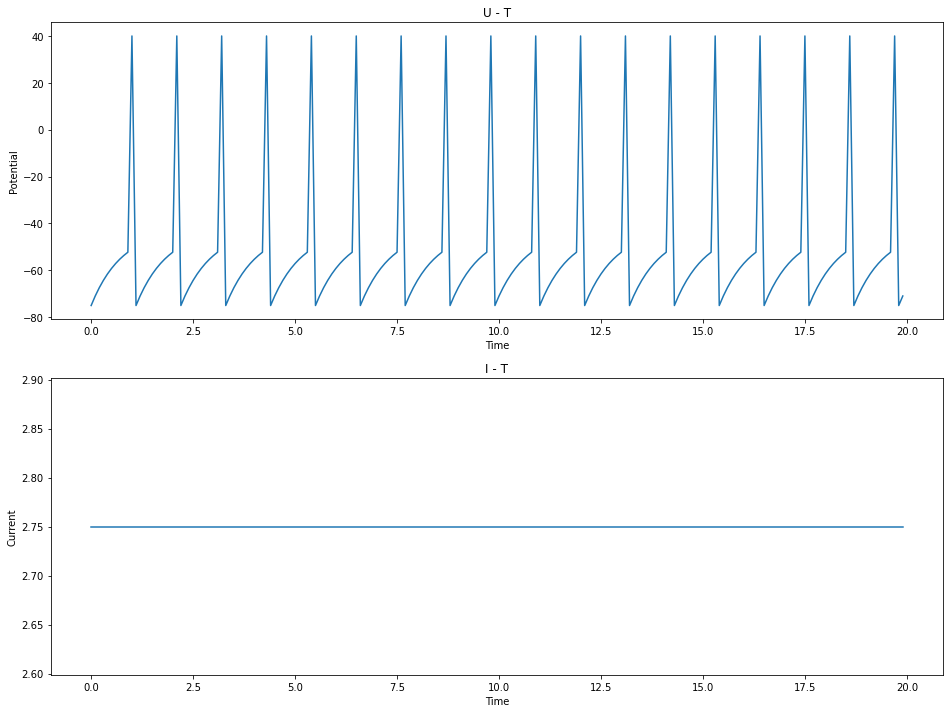

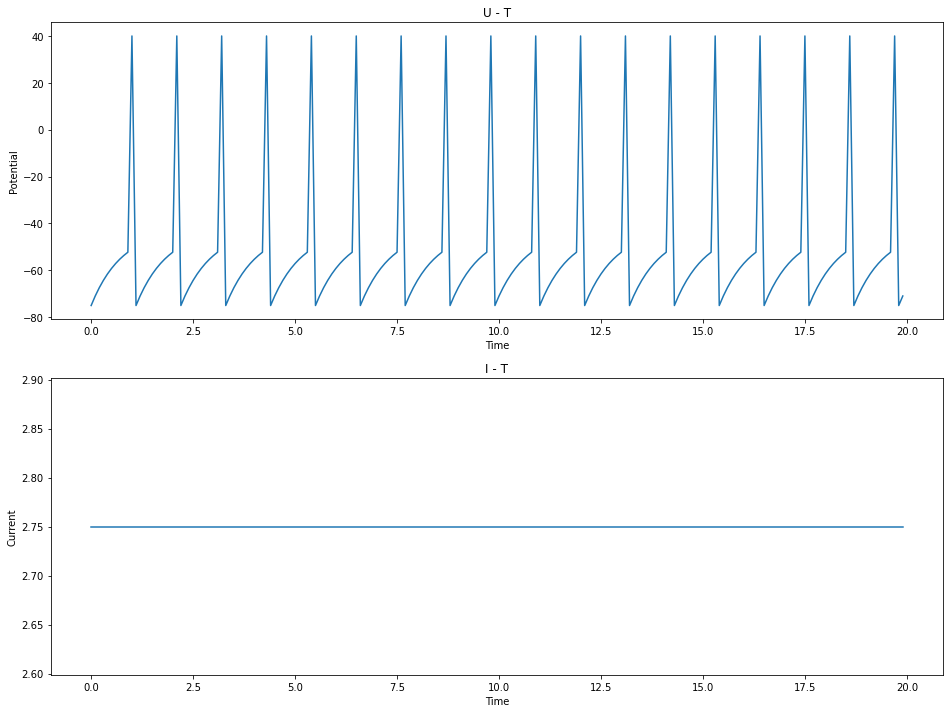

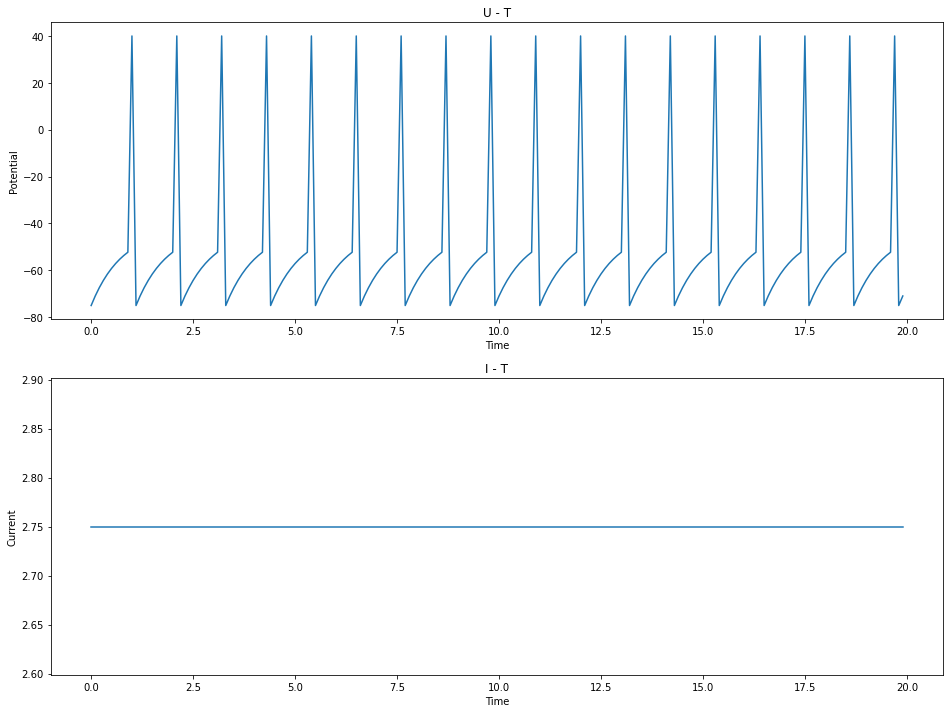

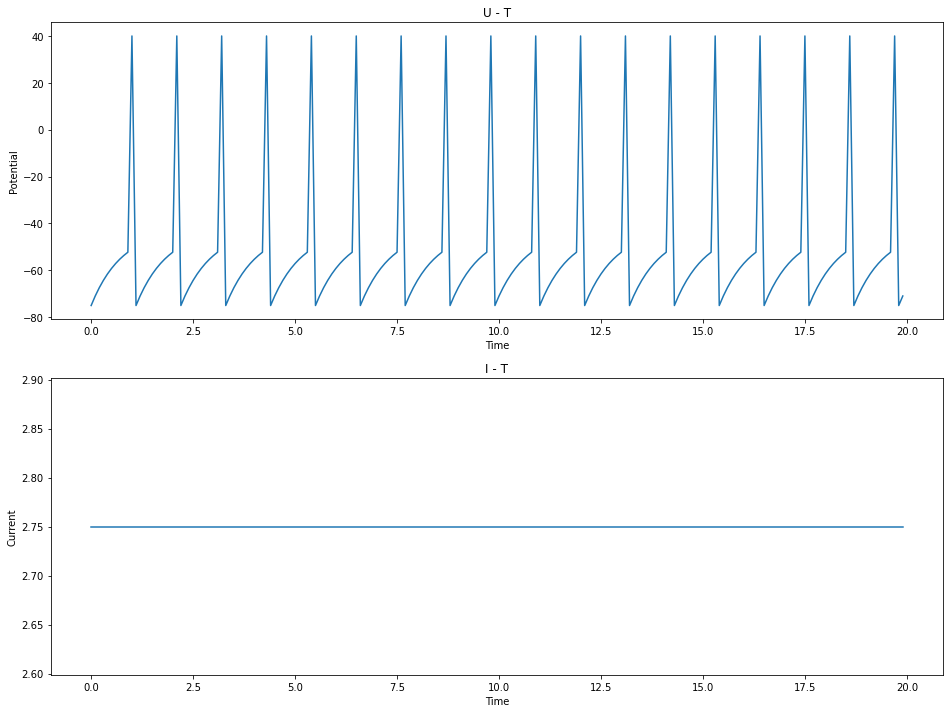

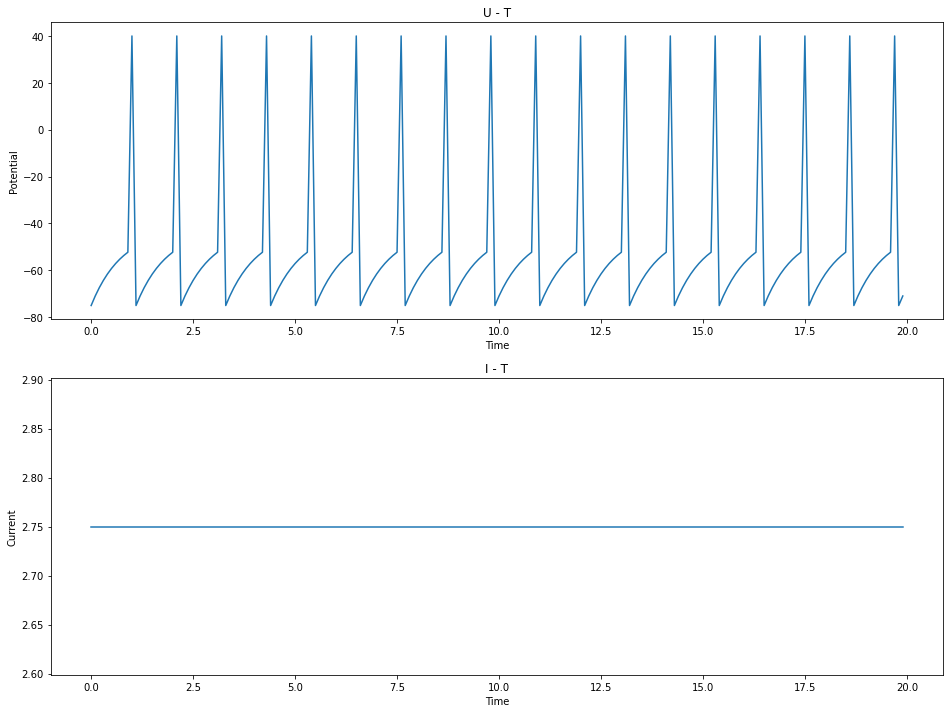

In [75]:
for i in range(10):
    neurons[i + 20].plot()

In [76]:
population_activity = np.zeros(200)
for t in neurons_group.exc_spikes_time:
    population_activity[t] += 1
for t in neurons_group.inh_spikes_time:
    population_activity[t] += 1
population_activity = population_activity / 30

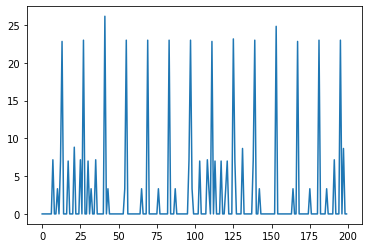

In [77]:
plt.plot(population_activity)

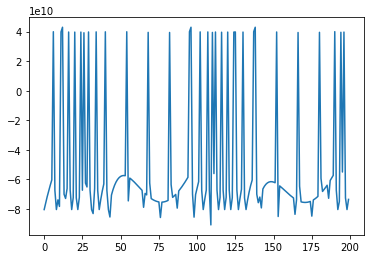

In [78]:
u_sum = np.zeros(200)
for i in neurons_group.neurons:
    for t in range(200):
        u_sum[t] += u_sum[t] + i.u[t]
plt.plot(u_sum)